<div class="alert alert-success" >
    <center><h1><font color=#4a7d52>Data Mining Final Project</font></h1></center><br>
    <center>2022/2023</center>
</div>

### Group Registration

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |      Filipe Dias        |       r20181050        | 
| 2    |      Inês Santos       |       r20191184         | 
| 3    |      Manuel Marreiros       |       r20191223        | 

**<h3>Table of Contents</h3>**
* [1. Data Exploration](#dataexploration)
    * [1.1 Initial Analysis](#initialanalysis)
    * [1.2 Visual Exploration](#visualexploration)
* [2. Data Preprocessing](#datapreprocessing)
    *  [2.1 Formatting Data](#formattingdata)
        *  [2.1.1 Encoding](#encoding)
    *  [2.2 Outlier Removal](#outlierremoval)
    *  [2.3 Feature Engineering](#featureengineering)
    *  [2.4 Filling Missing Values](#missingvalues)
    *  [2.5 Data Normalization](#normalization)
    *  [2.6 Redoing Data Exploration](#redoingexploration)
* [3. Modelling](#modelling)
    *  [3.1 Segmentation](#segmentation)
    *  [3.2 Hierarchical Clustering](#hierarchicalclustering)
    *  [3.3 K-Means](#kmeans)
    *  [3.4 Mean Shift Clustering](#meanshift)
    *  [3.5 DBSCAN](#dbscan)

## <div id="dataexploration">1. Data Exploration</font></div>

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from IPython.core.display import HTML
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
from pandas_profiling import ProfileReport
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.base import clone

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors

from matplotlib.lines import Line2D
from matplotlib import __version__ as mplver

import warnings
warnings.filterwarnings('ignore')

### <div id="initialanalysis">1.1. Initial Analysis</div>

In [2]:
# Reading the data
customers = pd.read_sas("a2z_insurance.sas7bdat")

In [3]:
# Setting the Customer ID as the index of the data
customers.set_index('CustID', inplace = True)

In [4]:
# Lets make a copy of the original dataset 
customers_original = customers.copy()

In [5]:
# Dataset head
customers.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [6]:
# Dataset data types
customers.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [7]:
# Count of missing values
customers.isnull().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [8]:
# Duplicated observations
customers.duplicated().sum()

3

In [9]:
# Checking the duplicated rows
customers[customers.duplicated(keep=False)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2076.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
2100.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
3507.0,1986.0,1952.0,b'2 - High School',3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56
8014.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
8122.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
9554.0,1986.0,1952.0,b'2 - High School',3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56


We identified the duplicated rows presented above, however, we did not consider this a mistake, since it can just be a coincidence, and kept the records.

In [10]:
# Descriptive statistics
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80
PremHealth,10253.0,171.580833,296.405976,-2.11,111.80,162.81,219.8200,28272.00


### <div id="visualexploration">1.2. Visual Exploration</div>

In [11]:
# Defining metric and non-metric features
non_metric_features = ["EducDeg", "GeoLivArea", "Children"]
metric_features = customers.columns.drop(non_metric_features).to_list()

In [12]:
# Label dictionary where we associate the name of each variable in the dataset to a more human-readable label
labels = {'FirstPolYear':'First Policy Year', 
          'BirthYear':'Birthday Year', 
          'EducDeg': 'Education',
          'MonthSal':'Salary',
          'GeoLivArea': 'Geographical Area',
          'Children': 'Children',
          'CustMonVal':'Customer Monetary Value',
          'ClaimsRate':'Claims Rate', 
          'PremMotor':'Motor', 
          'PremHousehold':'Household', 
          'PremHealth':'Health', 
          'PremLife':'Life', 
          'PremWork':'Work Compensation'}

### <center>Histograms</center>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=33.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: s

findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'bz-bpmn-font' (ddf23dcd7eb7a6a3dff98c003612ee37.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Fo

findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'bz-modeler-font' (60d325f6ddc9f57a49a21fe06e698c07.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (seguibl.ttf

findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Noto Sans TC' (nstcr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Open Sans' (73f7301a9cd7a0

findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LucidaBrightDemiBold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Symbol' (sasgasb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.43
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LucidaBrightDemiItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Book Antiqua' (BKANT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: 

findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.05
findfont: score(<Font 'sas-icons' (sasicons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.335
findfont:

findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 0.525
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'pdficons' (pdficons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans JP' (nsjpb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans KR' (nskrl.ttf) normal 

findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
findfont: score(<Font 'Arial Unicode MS' (arialuni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.525
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Javanese Text' (javatext.ttf) 

findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Avenir Next for SAS' (anfsasli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Times New Roman Uni' (tnruni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: scor

findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Open Sans' (50145685042b4df07a1fd19957275b81.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05


findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Noto Sans SC' (nsscr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans KR' (nskrl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900

findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'CSongGB18030C-Light' (csongl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'LastResort' (lastrsrt.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'SAS Monospace Bold' (sasmonob.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriaz.tt

findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Noto Sans' (nsbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Thorndale AMT' (saswthr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothL.t

findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cumberland AMT' (saswcubi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Thai' (nsthb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans Ultra Bold Condensed' (GILLUBCD.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Noto Sans TC' (nstcr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Old English Tex

findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Open Sans' (33f225b8f5f7d6b34a0926f58f96c1e9.ttf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Noto Sans' (nsr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Thorndale AMT' (saswthi.ttf) italic normal 400 normal>) = 11.05
findfont: score(<F

findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LucidaBrightRegular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'HeiT' (heit.ttf) normal normal 4

findfont: score(<Font 'Symbol MT' (sasgsymb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Thorndale AMT' (saswthb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMC

findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 1.335
findfont: score(<Font 'Noto Sans' (nsb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Noto Sans TC' (nstcl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (

findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'MS Mincho' (msmincho.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Times New Roman Symbol' (sasgtsbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'R

findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.3825
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.25
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 10.24
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Noto Sans Thai' (nsthr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.145
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Cumberland AMT' (saswcui.ttf) italic no

findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasi.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Noto Sans TC' (nstcb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.535
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Modern No. 20' 

findfont: score(<Font 'CSongGB18030C-Light' (csongl.ttf) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Curlz MT' (CURLZ___.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT Condensed'

findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Avenir Next for SAS' (anfsasr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PERBI___.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Batang' (batang.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHL

findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Noto Sans KR' (nskrr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Noto Sans Thai' (nsthr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.25
findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Thorndale AMT' (saswthr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Script MT Bold' (SCRIPTB

findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LucidaSansDemiBold.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.05
findfont: s

findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.3825
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Thorndale AMT' (saswthbi.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'sas-icons' (sasicons.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'MingLiU' (mingliu.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) 

findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Times New Roman Uni' (tnruni.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'GLYPHICONS Halflings' (e18bbf611f2a2e43afc071aa2f4e1512.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LucidaSansRegular.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 no

findfont: score(<Font 'Arial Symbol' (sasgasr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 600 normal>) = 10.145
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Bauhaus 93' (BAUHS93.

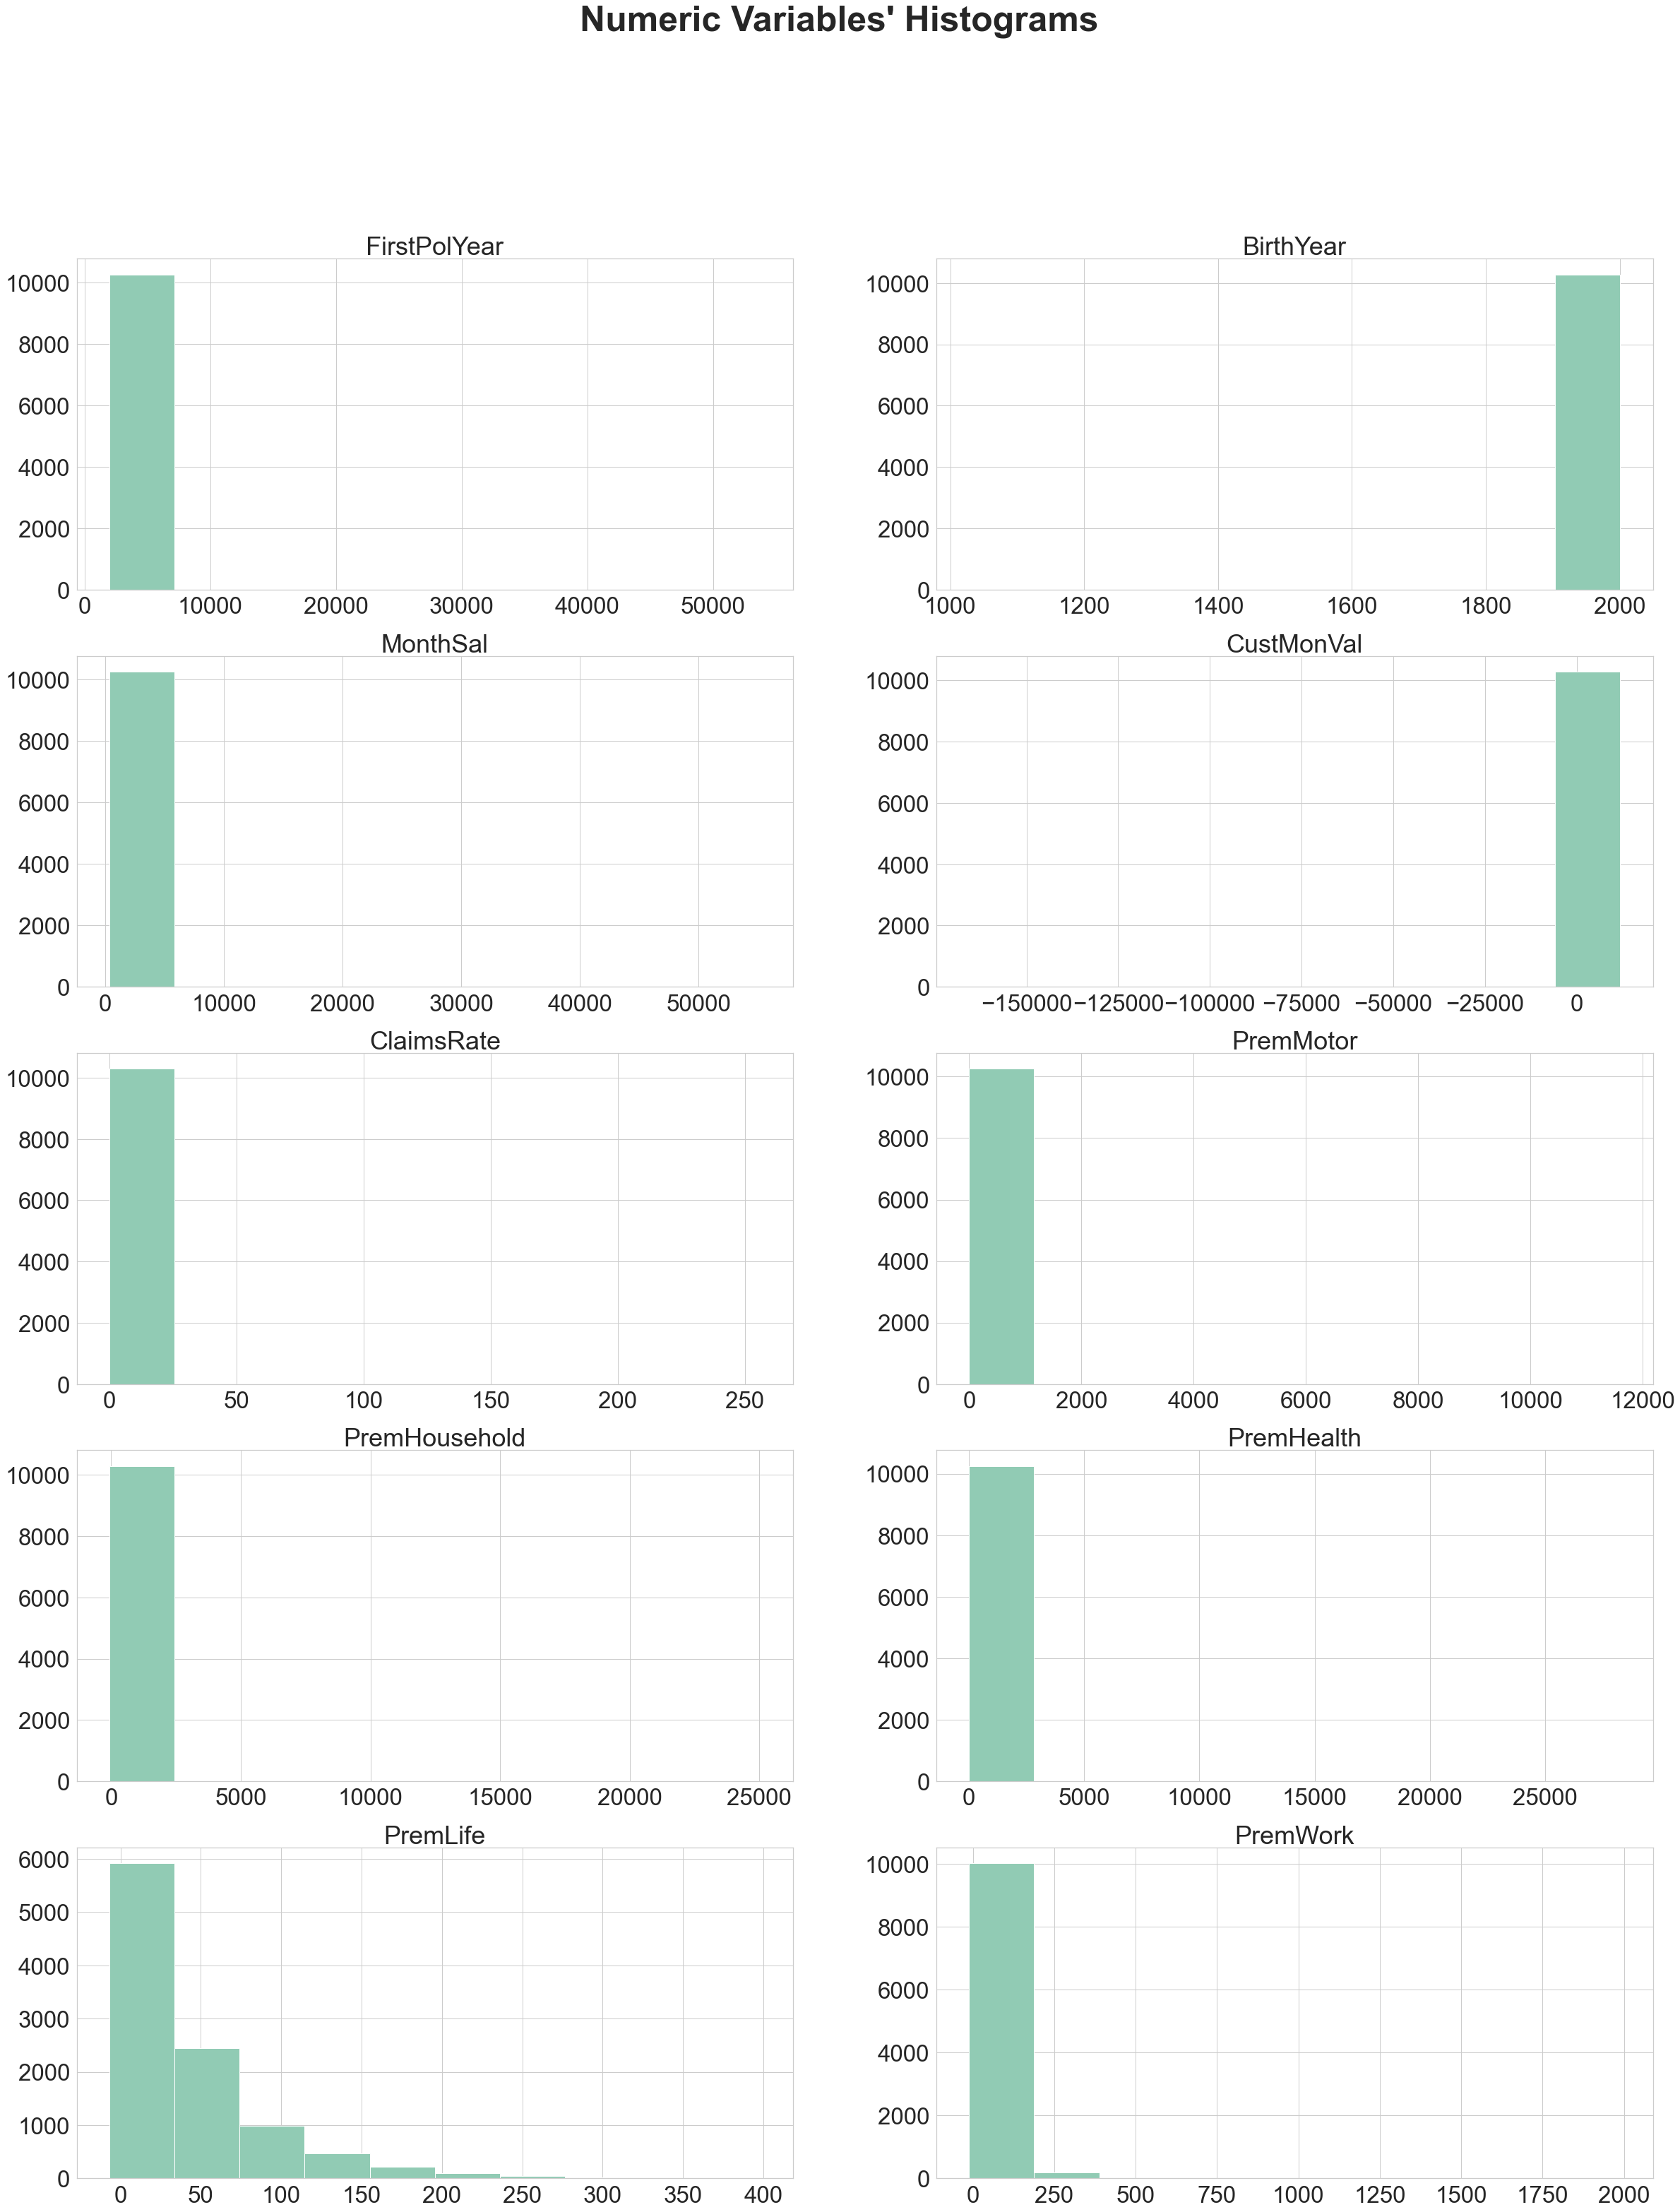

In [13]:
# All Numeric Variables' Histograms in one figure
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(5, ceil(len(metric_features) / 5), figsize=(40, 50))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(customers[feat], color='#91CBB4')
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, fontsize=50, fontweight="bold")

plt.show()

### <center>Box-Plots</center>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=bold:stretch=normal:size=36.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.05
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.335
findfon

findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'bz-bpmn-font' (ddf23dcd7eb7a6a3dff98c003612ee37.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.335

findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 600 normal>) = 10.145
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'bz-modeler-font' (60d325f6ddc9f57a49a21fe06e698c07.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.535
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Verda

findfont: score(<Font 'Open Sans' (78b08a68d05d5fabb0b8effd51bf6ade.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Noto Sans TC' (nstcr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 0.05
findfont: score(<Font 'Tempus Sans ITC' 

findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.4395
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.145
findfont: score(<Font 'Albany AMT' (saswali.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.25
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Bright' (LucidaBrightDemiBold.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Arial Symbol' (sasgasb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.145
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.335
findfont: 

findfont: score(<Font 'Thorndale AMT' (saswthbi.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'pdficons' (pdficons.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.24
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.335
findfont: score(<Font 'sas-icons' (sasicons.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.145
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.145
findf

findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.24
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.25
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 0.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) norm

findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal 600 normal>) = 11.145
findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 600 normal>) = 10.145
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.3825
findfont: score(<Font 'Arial Unicode MS' (arialuni.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.24
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.535
findfont: score(<Font 'Harrington' (H

findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.145
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Avenir Next for SAS' (anfsasli.ttf) italic normal 300 normal>) = 11.43
findfont: score(<Font 'Times New Roman Uni' (tnruni.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gill Sans Ultra Bold'

findfont: score(<Font 'Cumberland AMT' (saswcui.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.145
findfont: score(<Font 'Albany AMT' (saswalb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Open Sans' (50145685042b4df07a1fd19957275b81.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 nor

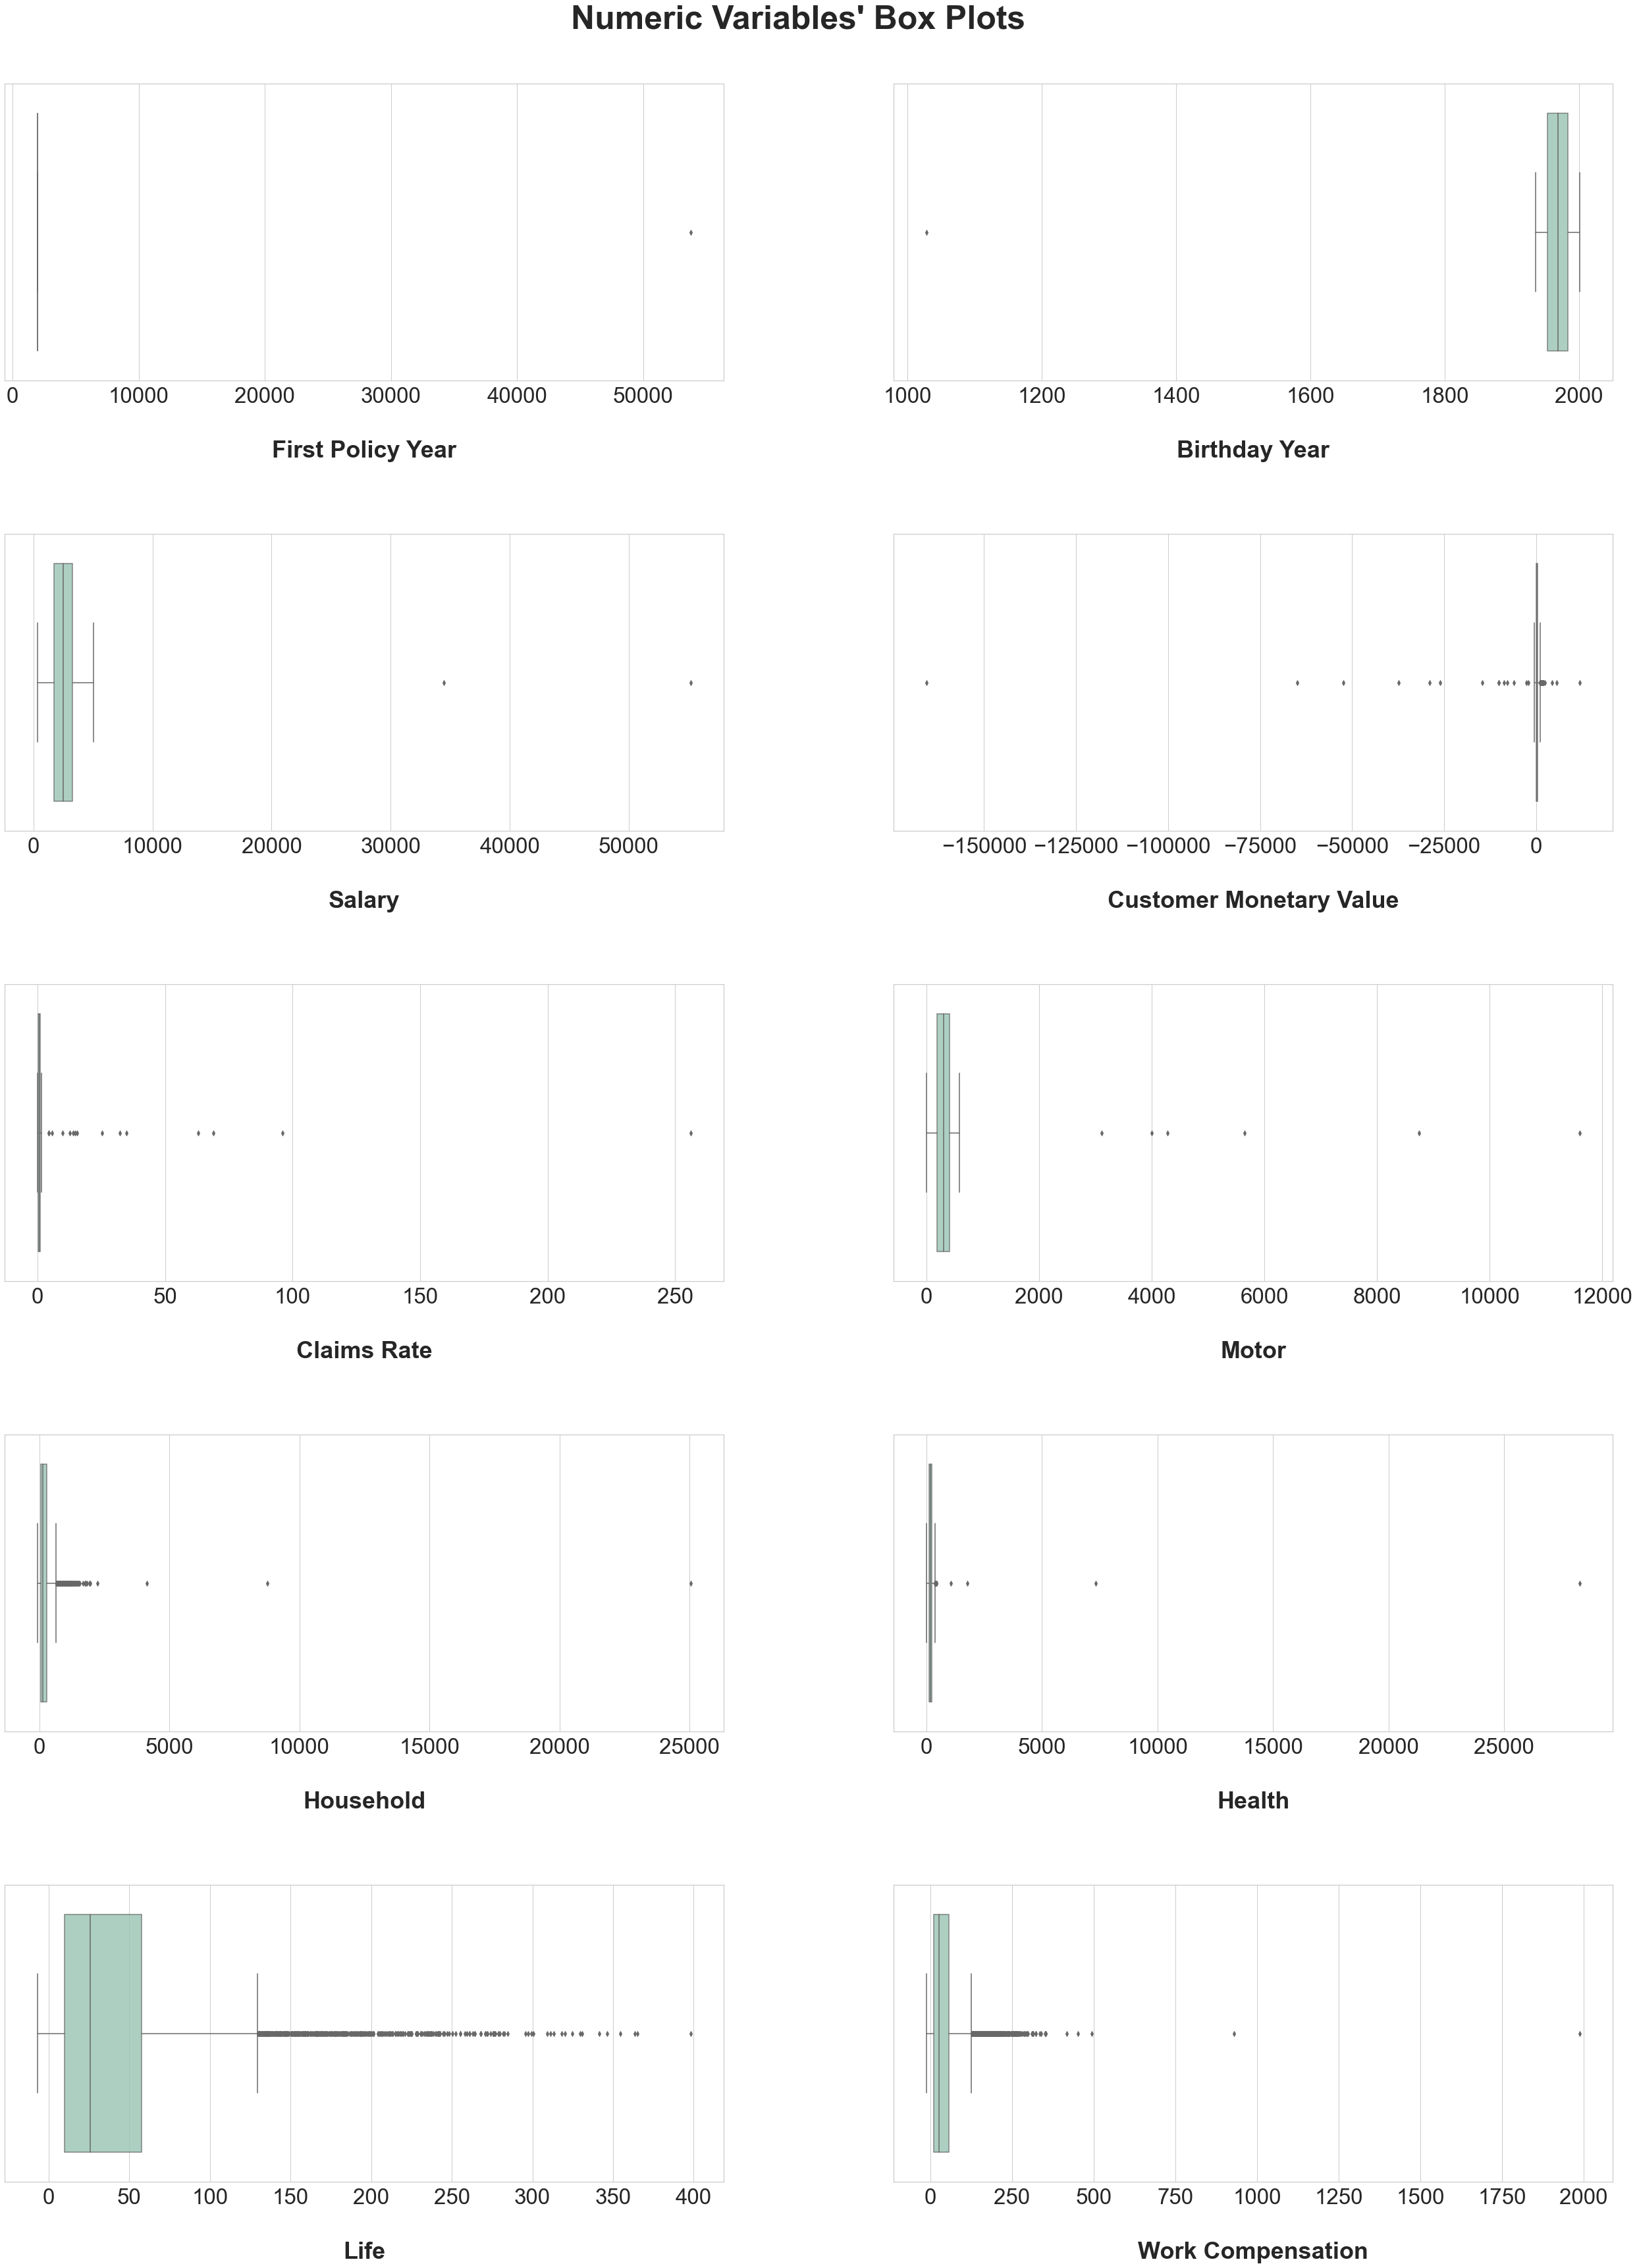

In [14]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(5, ceil(len(metric_features) / 5), figsize=(40, 50))
plt.tight_layout(pad=5)

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=customers[feat], 
                ax=ax, 
                color='#91CBB4',
                boxprops=dict(alpha=.8)).set_xlabel(labels[feat],labelpad=50, fontweight="bold")

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, fontsize=50, fontweight="bold")

plt.show()

### <center>Correlation Matrix</center>

In [15]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000024C31D3AFD0>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000024C31D3AFD0> on colorbar
Setting pcolormesh
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 

findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'bz-bpmn-font' (ddf23dcd7eb7a6a3dff98c003612ee37.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Wingdings 3' (WINGDNG3.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145

findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 0.05
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LBRITED.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'bz-modeler-font' (60d325f6ddc9f57a49a21fe06e698c07.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 1.25
findfont: score(<Font 'Gill Sans MT' (GILBI___.TT

findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.43
findfont: score(<Font 'Open Sans' (78b08a68d05d5fabb0b8effd51bf6ade.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Noto Sans TC' (nstcr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (a

findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Albany AMT' (saswali.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LucidaBrightDemiBold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial Symbol' (sasgasb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.43
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: scor

findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'pdficons' (pdficons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothM.ttc) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.05
findfont: score(<Font 'sas-icons' (sasicons.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: sco

findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 0.525
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.t

findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
findfont: score(<Font 'Arial Unicode MS' (arialuni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.525
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Harrington' (HARNGTON.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal nor

findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Avenir Next for SAS' (anfsasli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Times New Roman Uni' (tnruni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cent

findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Albany AMT' (saswalb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Open Sans' (50145685042b4df07a1fd19957275b81.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10

findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Noto Sans SC' (nsscr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal 

findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'CSongGB18030C-Light' (csongl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'LastResort' (lastrsrt.ttf) normal normal 400

findfont: score(<Font 'Avenir Next for SAS' (anfsasr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Noto Sans' (nsbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Thorndale AMT' (saswthr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Cand

findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Noto Sans' (nsbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bernard MT Condensed' (BERNHC.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Bodoni MT' (BOD_BLAR.TTF) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Cumberland AMT' (saswcubi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Chiller' (CHILLER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Agency FB' (AGENCYB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Noto Sans Thai' (nsthb.ttf)

findfont: score(<Font 'Segoe Script' (segoesc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Showcard Gothic' (SHOWG.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Open Sans' (33f225b8f5f7d6b34a0926f58f96c1e9.ttf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'OCR A Extended' (OCRAEXT.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasb.ttf) normal normal 700 normal>) = 10.

findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Albany AMT' (saswalr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman Symbol' (sasgtsr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Bodoni MT' (BOD_R.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Bright' (LucidaBrightRegular.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bell MT' (BELLB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Constantia' (constanb.ttf)

findfont: score(<Font 'MYingHei_18030_C-MediumHWL' (myinghwl.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Avenir Next for SAS' (anfsasi.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Noto Sans' (nsb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Symbol MT' (sasgsymb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bradley Hand ITC' (BRADHITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Thorndale AMT' (saswthb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calibri' (calibri.ttf) norma

findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (arialbi.ttf) italic normal 700 normal>) = 1.335
findfont: score(<Font 'Noto Sans' (nsb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Noto Sans TC' (nstcl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Bodoni 

findfont: score(<Font 'Cumberland AMT' (saswcur.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasli.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'MS Mincho' (msmincho.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Times New Roman Symbol' (sasgtsbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Rockw

findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Symbola' (symbolah.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.3825
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.25
findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal 500 normal>) = 10.24
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Noto Sans Thai' (nsthr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Demi' (FRADMIT.

findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Avenir Next for SAS' (anfsasl.ttf) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasi.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Consolas' (consolaz.ttf) italic normal 700 normal>) = 11.05


findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Noto Sans' (nsi.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Noto Sans KR' (nskrr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Leelawadee UI' (LeelUIsl.ttf) normal normal 350 normal>) = 10.3825
findfont: score(<Font 'CSongGB18030C-Light' (csongl.ttf) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Forte' (FORTE.TTF) normal norm

findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gulim' (gulim.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Avenir Next for SAS' (anfsasr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gara

findfont: score(<Font 'Microsoft Tai Le' (taileb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKBI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Noto Sans KR' (nskrr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Noto Sans Thai' (nsthr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic n

findfont: score(<Font 'Bodoni MT' (BOD_BLAI.TTF) italic normal 900 normal>) = 11.24
findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.535
findfont: score(<Font 'Candara' (Candara.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Tw Cen MT' (TCB_____.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LucidaSansDemiBold.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.335
findfont: 

findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasbi.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Times New Roman Symbol' (sasgtsi.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Helvetica Neue for SAS' (hnfsasi.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.3825
findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Perpetua' (PERB____.TTF) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Microsoft JhengHei' (msjhbd.ttc) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Mic

findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Cumberland AMT' (saswcubi.ttf) italic normal 700 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal 300 normal>) = 10.43
findfont: score(<Font 'Times New Roman Uni' (tnruni.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'GLYPHICONS Halflings' (e18bbf611f2a2e43afc071aa2f4e1512.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal 400 

findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Avenir Next for SAS' (anfsasb.ttf) normal normal 700 normal>) = 10.05
findfont: score(<Font 'Arial Symbol' (sasgasr.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.335
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.335
findfont: score(<Font 'Lucida Sans' (LSANSI.TTF) italic normal 400 normal>) = 11.335
findfont: score(<Font 'Eras Bold ITC' (ER

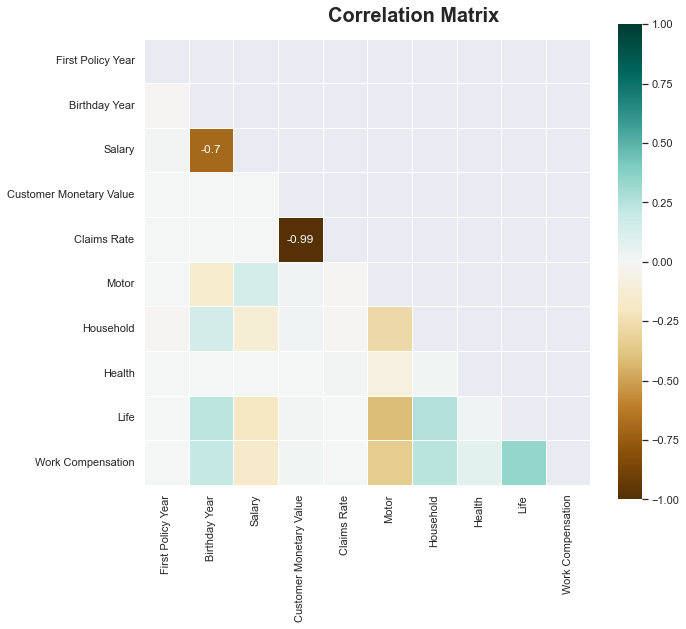

In [16]:
sns.set()

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix, rounding the values to 2 decimal cases
corr = np.round(customers[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Getting the Upper Triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Getting the labels for the heatmap
ticklabels = list()

for i in labels.keys():
    if i in metric_features:
        ticklabels.append(labels[i])

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, xticklabels = ticklabels,  yticklabels = ticklabels, annot=annot, 
            cmap='BrBG', fmt='s', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, mask=mask)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20, fontweight="bold")

plt.show()

## <div id="datapreprocessing">2. Data Preprocessing</div>

### <div id="formattingdata">2.1 Formatting Data</div>

In [17]:
# Fixing wrong dtype for variable Children
#customers.Children = customers.Children.astype("boolean")

#### <div id="encoding">2.1.1 Encoding</div>

In [18]:
customers['EducDeg'].value_counts(dropna=False)

b'3 - BSc/MSc'        4799
b'2 - High School'    3510
b'1 - Basic'          1272
b'4 - PhD'             698
NaN                     17
Name: EducDeg, dtype: int64

In [19]:
# Identifying each education degree by one number
customers.EducDeg = customers.EducDeg.astype('string').str[2]

In [20]:
customers['EducDeg'].value_counts(dropna=False)

3      4799
2      3510
1      1272
4       698
NaN      17
Name: EducDeg, dtype: Int64

### <div id="outlierremoval">2.2 Outlier Removal</div>

#### IQR Method

In [21]:
q25 = customers.quantile(.25)
q75 = customers.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(customers[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = customers[np.array(filters2)]

In [22]:
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / customers_original.shape[0], 4)*100,'%')

Percentage of data kept after removing outliers: 83.1 %


#### Manually Removing Outliers

In [23]:
filters1 = (
    (customers['FirstPolYear']<=2016) # Because any value after 2016, the current year, must be an error
    &
    (customers['BirthYear']>=1900) # Wether we put this variable bigger than 1800, for example, or 1900, the result will
                                   # be the same, and it makes no sense to include customers born prior to the 20th century
    &
    (customers['MonthSal']<=10000)
    &
    (customers['CustMonVal']>=-2000)
    &
    (customers['ClaimsRate']<=20)
    &
    (customers['PremMotor']<=2000)
    &
    (customers['PremHousehold']<=2000)
    &
    (customers['PremHealth']<=3000)
    &
    (customers['PremLife']<=350)
    &
    (customers['PremWork']<=400)
)

df_1 = customers[filters1]

In [24]:
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / customers_original.shape[0], 4)*100,'%')

Percentage of data kept after removing outliers: 96.76 %


In [25]:
customers = df_1

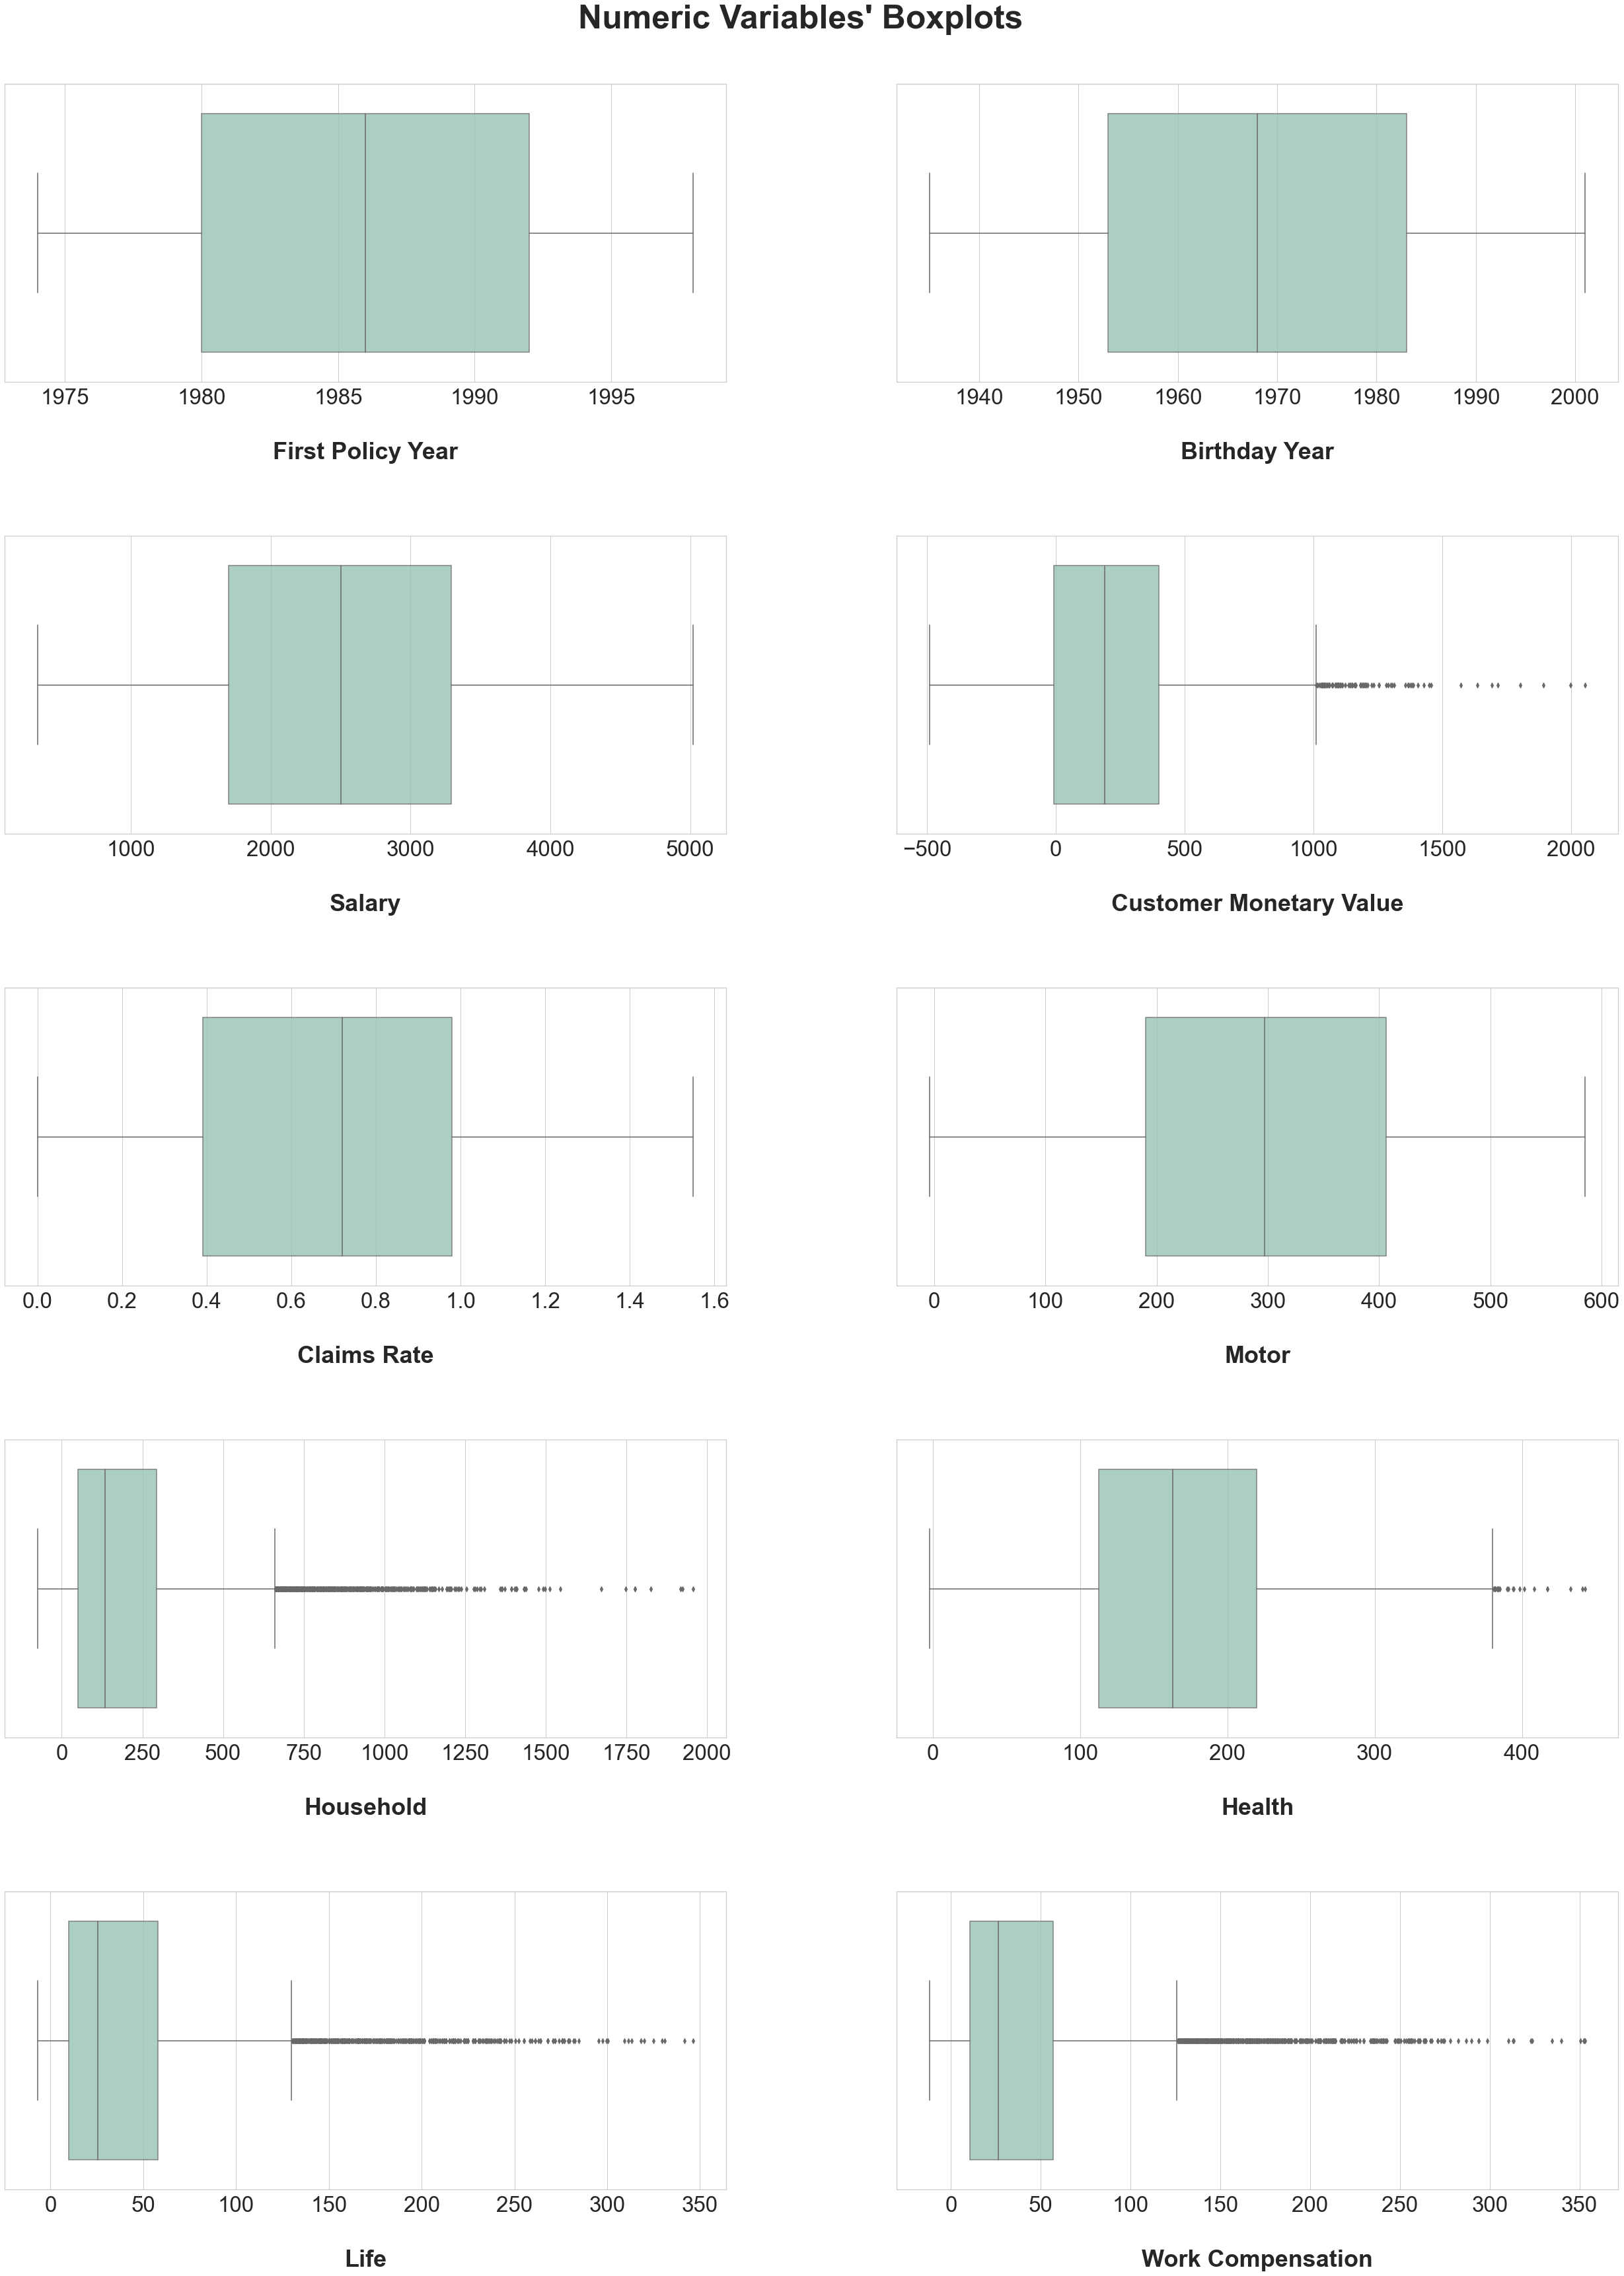

In [26]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(5, ceil(len(metric_features) / 5), figsize=(40, 50))
plt.tight_layout(pad=5)

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=customers[feat], 
                ax=ax, 
                color='#91CBB4',
                boxprops=dict(alpha=.8)).set_xlabel(labels[feat],labelpad=50, fontweight="bold")

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplots"

plt.suptitle(title, fontsize=50, fontweight="bold")

plt.show()

### <div id="featureengineering">2.3 Feature Engineering</div>

In [27]:
#The database is from 2016, so we have to subtract 2016 to the year of birth
Current_year= 2016
customers['Age'] = Current_year - customers['BirthYear']

In [28]:
#let's create a variable years_as_customer 
customers['Years_as_customer'] = Current_year - customers['FirstPolYear']

In [29]:
#Let's see if we have customers that are more time clients then alive
customers[customers['Years_as_customer']>=customers['Age']]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Years_as_customer
CustID,,,,,,,,,,,,,,,
2.0,1981.0,1995.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,35.0
14.0,1983.0,2000.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46,16.0,33.0
19.0,1981.0,1982.0,1,1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57,34.0,35.0
21.0,1986.0,1986.0,4,1704.0,4.0,1.0,373.73,0.39,329.84,65.00,221.93,3.89,33.34,30.0,30.0
23.0,1976.0,1986.0,2,1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90,30.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268.0,1977.0,1996.0,1,834.0,4.0,1.0,254.72,0.67,181.48,309.50,134.58,114.80,98.24,20.0,39.0
10269.0,1987.0,1988.0,3,1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.46,28.0,29.0
10274.0,1989.0,1992.0,2,1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.12,24.0,27.0


In [30]:
#Let's understand if we have customers with children at a age lower than 18 
customers[(customers['Children']==1) & (customers['Age']<=18)] 

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Years_as_customer
CustID,,,,,,,,,,,,,,,
14.0,1983.0,2000.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46,16.0,33.0
187.0,1993.0,1999.0,1,1247.0,2.0,1.0,-128.24,1.07,33.23,1026.30,82.57,75.68,212.15,17.0,23.0
398.0,1986.0,2000.0,1,415.0,1.0,1.0,-218.48,1.22,52.01,348.40,49.01,193.48,225.82,16.0,30.0
481.0,1984.0,1999.0,1,1581.0,4.0,1.0,866.27,0.21,30.34,683.45,98.13,71.68,249.16,17.0,32.0
498.0,1977.0,1998.0,1,1260.0,4.0,1.0,-64.12,1.04,120.58,641.80,128.69,153.14,39.12,18.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044.0,1983.0,1999.0,1,1110.0,1.0,1.0,907.28,0.34,25.56,1011.85,120.80,144.25,105.13,17.0,33.0
10122.0,1978.0,1999.0,1,738.0,4.0,1.0,365.19,0.53,57.12,293.95,100.02,276.83,96.24,17.0,38.0
10153.0,1978.0,1998.0,1,1750.0,1.0,1.0,293.17,0.61,130.47,271.15,105.13,270.83,47.34,18.0,38.0


In [31]:
#Total amount of premiums 
customers['Total_Annual_Premiums'] = customers.loc[:,['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']].sum(1)

In [32]:
#Lets understand the annual salary of the customers
customers['Annual_Salary'] = 12 * customers['MonthSal']

In [33]:
#Let's see if we have children with monthsal 
customers[(customers['Annual_Salary']!=0) & (customers['Age']<18)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Years_as_customer,Total_Annual_Premiums,Annual_Salary
CustID,,,,,,,,,,,,,,,,,
14.0,1983.0,2000.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46,16.0,33.0,877.28,12516.0
187.0,1993.0,1999.0,1,1247.0,2.0,1.0,-128.24,1.07,33.23,1026.30,82.57,75.68,212.15,17.0,23.0,1429.93,14964.0
398.0,1986.0,2000.0,1,415.0,1.0,1.0,-218.48,1.22,52.01,348.40,49.01,193.48,225.82,16.0,30.0,868.72,4980.0
481.0,1984.0,1999.0,1,1581.0,4.0,1.0,866.27,0.21,30.34,683.45,98.13,71.68,249.16,17.0,32.0,1132.76,18972.0
527.0,1982.0,1999.0,1,840.0,4.0,1.0,-23.54,1.00,132.69,165.60,137.36,129.69,164.14,17.0,34.0,729.48,10080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937.0,1989.0,1999.0,1,918.0,3.0,1.0,738.24,0.20,29.45,457.85,117.69,275.94,78.35,17.0,27.0,959.28,11016.0
9948.0,1987.0,2000.0,1,422.0,1.0,1.0,-145.58,1.07,36.23,1409.15,66.68,14.78,171.59,16.0,29.0,1698.43,5064.0
10044.0,1983.0,1999.0,1,1110.0,1.0,1.0,907.28,0.34,25.56,1011.85,120.80,144.25,105.13,17.0,33.0,1407.59,13320.0


In [34]:
#To understand the amount paid by the insurance company, we will use the formula: Amount_paid_insurance_company= (2*Total_Anual_Premiums)*Claimsrate.
#We assume that we have two years equal in terms of total anual premiums
customers['Amount_paid_insurance_company'] = ((2*customers['Total_Annual_Premiums'])*customers['ClaimsRate'])
#Amount_paid_insurance_company is refering to 2 years
customers['Amount_paid_year_insurance_company'] = customers['Amount_paid_insurance_company']/2
#Amount_paid_year_insurance_company just refers to 1 year

In [35]:
#Let's understand the weight of the Premiums on the total Annual Salary
customers['SalarySpent_Ratio'] = customers['Total_Annual_Premiums']/customers['Annual_Salary']

In [36]:
#Annual profit from customer=Total_Annual_Premiums-(Amount_paid_year_insurance_company)
customers['Annual_profit_customer'] = customers['Total_Annual_Premiums']-(customers['Amount_paid_year_insurance_company'])

In [37]:
#Acquisiton cost = (Annual_profit_customer*Years_as_customer)-CustMonVal
#customers['Acquisiton_cost'] = (customers['Annual_profit_customer']*customers['Years_as_customer'])-customers['CustMonVal']
#Results doesn't make sense 

In [38]:
customers.drop(columns=['BirthYear'], inplace=True)
customers.drop(columns=['FirstPolYear'], inplace=True)
customers.drop(columns=['MonthSal'], inplace=True)
customers.drop(columns=['Amount_paid_insurance_company'], inplace=True)

In [39]:
metric_features = list(map(lambda x: x.replace('BirthYear', 'Age'), metric_features))
metric_features = list(map(lambda x: x.replace('FirstPolYear', 'Years_as_customer'), metric_features))
metric_features = list(map(lambda x: x.replace('MonthSal', 'Annual_Salary'), metric_features))
metric_features.extend(['Total_Annual_Premiums','Amount_paid_year_insurance_company','SalarySpent_Ratio','Annual_profit_customer'])

In [40]:
customers.head()

,EducDeg,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Years_as_customer,Total_Annual_Premiums,Annual_Salary,Amount_paid_year_insurance_company,SalarySpent_Ratio,Annual_profit_customer
CustID,,,,,,,,,,,,,,,,,
1.0,2,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0,31.0,665.56,26124.0,259.5684,0.025477,405.9916
2.0,2,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,35.0,910.96,8124.0,1020.2752,0.112132,-109.3152
3.0,1,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0,25.0,740.60,27324.0,207.3680,0.027104,533.2320
4.0,3,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0,26.0,600.68,13188.0,594.6732,0.045547,6.0068
5.0,3,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0,30.0,629.24,21156.0,566.3160,0.029743,62.9240


In [41]:
metric_features

['Years_as_customer',
 'Age',
 'Annual_Salary',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Total_Annual_Premiums',
 'Amount_paid_year_insurance_company',
 'SalarySpent_Ratio',
 'Annual_profit_customer']

In [42]:
customers['Age'] = customers.apply(lambda x: None if x.Years_as_customer >= x.Age else x.Age, axis=1) 

### <div id="messingvalues">2.4 Filling Missing Values</div>

In [43]:
# Creating a copy to apply central tendency measures imputation
customers_central = customers.copy()

In [44]:
customers_central.median(numeric_only=True)

GeoLivArea                                3.000000
Children                                  1.000000
CustMonVal                              188.585000
ClaimsRate                                0.720000
PremMotor                               297.280000
PremHousehold                           133.900000
PremHealth                              163.030000
PremLife                                 25.560000
PremWork                                 26.340000
Age                                      54.000000
Years_as_customer                        30.000000
Total_Annual_Premiums                   700.680000
Annual_Salary                         30018.000000
Amount_paid_year_insurance_company      546.313300
SalarySpent_Ratio                         0.023275
Annual_profit_customer                  213.706800
dtype: float64

In [45]:
# Calculating the mode for each non-numeric feature
modes = customers_central[non_metric_features].mode().loc[0]

In [46]:
modes

EducDeg         3
GeoLivArea    4.0
Children      1.0
Name: 0, dtype: object

In [47]:
#customers_central.fillna(customers_central.median(numeric_only=True), inplace=True)
customers_central.fillna(modes, inplace=True)
customers_central.isna().sum()

EducDeg                                  0
GeoLivArea                               0
Children                                 0
CustMonVal                               0
ClaimsRate                               0
PremMotor                                0
PremHousehold                            0
PremHealth                               0
PremLife                                 0
PremWork                                 0
Age                                   2100
Years_as_customer                        0
Total_Annual_Premiums                    0
Annual_Salary                            0
Amount_paid_year_insurance_company       0
SalarySpent_Ratio                        0
Annual_profit_customer                   0
dtype: int64

In [48]:
customers = customers_central.copy()

In [49]:
# creating an object for KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputer.fit(customers[metric_features])
customers[metric_features] = imputer.transform(customers[metric_features]) #filling the missing numerical values with the KNN imputer

In [50]:
customers.isna().sum()

EducDeg                               0
GeoLivArea                            0
Children                              0
CustMonVal                            0
ClaimsRate                            0
PremMotor                             0
PremHousehold                         0
PremHealth                            0
PremLife                              0
PremWork                              0
Age                                   0
Years_as_customer                     0
Total_Annual_Premiums                 0
Annual_Salary                         0
Amount_paid_year_insurance_company    0
SalarySpent_Ratio                     0
Annual_profit_customer                0
dtype: int64

In [51]:
#ProfileReport(
#    customers,
#    title='Customers Data Preprocessed',
#    correlations={
#        "pearson": {"calculate": True},
#        "spearman": {"calculate": False},
#        "kendall": {"calculate": False},
#        "phi_k": {"calculate": False},
#        "cramers": {"calculate": False},
#    },
#)

### <div id="normalization">2.5 Data Normalization</div>

In [52]:
customers_minmax = customers.copy()

In [53]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(customers_minmax[metric_features])
scaled_feat

array([[0.54166667, 0.24193548, 0.39334471, ..., 0.12666688, 0.0441576 ,
        0.3423915 ],
       [0.70833333, 0.10645161, 0.07337884, ..., 0.49788446, 0.28806923,
        0.13969688],
       [0.29166667, 0.43548387, 0.41467577, ..., 0.10119359, 0.04873837,
        0.39244118],
       ...,
       [0.16666667, 0.33870968, 0.55140785, ..., 0.07134927, 0.0284134 ,
        0.39904848],
       [0.70833333, 0.32258065, 0.34940273, ..., 0.24579977, 0.06466708,
        0.28938022],
       [0.33333333, 0.25806452, 0.52943686, ..., 0.08821948, 0.02823808,
        0.37495563]])

In [54]:
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [ 1.80000000e+01  1.90000000e+01  3.99600000e+03 -4.90200000e+02
  0.00000000e+00 -4.11000000e+00 -7.50000000e+01 -2.11000000e+00
 -7.00000000e+00 -1.20000000e+01  4.63640000e+02  0.00000000e+00
  9.78899282e-03 -4.64464000e+02] 
 [4.20000000e+01 8.10000000e+01 6.02520000e+04 2.05407000e+03
 1.55000000e+00 5.85220000e+02 1.95760000e+03 4.42860000e+02
 3.46400000e+02 3.53180000e+02 2.14208000e+03 2.04922080e+03
 3.65061095e-01 2.07781760e+03]


In [55]:
customers_minmax[metric_features] = scaled_feat
customers_minmax.head()

,EducDeg,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Years_as_customer,Total_Annual_Premiums,Annual_Salary,Amount_paid_year_insurance_company,SalarySpent_Ratio,Annual_profit_customer
CustID,,,,,,,,,,,,,,,,,
1.0,2,1.0,1.0,0.342405,0.251613,0.644732,0.075986,0.333663,0.152830,0.079112,0.241935,0.541667,0.120302,0.393345,0.126667,0.044158,0.342391
2.0,2,4.0,1.0,0.141129,0.722581,0.138411,0.241661,0.266984,0.570119,0.323484,0.106452,0.708333,0.266509,0.073379,0.497884,0.288069,0.139697
3.0,1,3.0,0.0,0.391024,0.180645,0.356778,0.147348,0.284716,0.264148,0.304014,0.435484,0.291667,0.165010,0.414676,0.101194,0.048738,0.392441
4.0,3,4.0,1.0,0.185990,0.638710,0.316614,0.058226,0.704047,0.119808,0.110466,0.258065,0.333333,0.081647,0.163396,0.290195,0.100651,0.185058
5.0,3,4.0,1.0,0.206515,0.580645,0.581559,0.060415,0.415084,0.072949,0.146366,0.387097,0.500000,0.098663,0.305034,0.276357,0.056165,0.207447


In [56]:
customers_standard = customers.copy()

In [57]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(customers_standard[metric_features])
scaled_feat

array([[ 0.15380757, -0.94422032, -0.32509383, ..., -0.93663394,
        -0.26483077,  0.62380194],
       [ 0.7595522 , -1.46976354, -1.84586361, ...,  1.88914283,
         2.65009016, -1.36460425],
       [-0.75480937, -0.19344428, -0.22370917, ..., -1.13054134,
        -0.2100872 ,  1.11478246],
       ...,
       [-1.20911784, -0.5688323 ,  0.42616645, ..., -1.35772181,
        -0.45298535,  1.17959909],
       [ 0.7595522 , -0.63139697, -0.53394621, ..., -0.02977238,
        -0.01972759,  0.10376862],
       [-0.60337321, -0.88165565,  0.32174026, ..., -1.2293026 ,
        -0.45508054,  0.9432516 ]])

In [58]:
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

Parameters fitted:
 [2.99843405e+01 4.90919093e+01 2.99718466e+04 2.19324879e+02
 6.80966673e-01 2.95535447e+02 2.08969670e+02 1.68595099e+02
 4.18575918e+01 4.10847701e+01 7.56042578e+02 5.11712807e+02
 3.33498660e-02 2.44329771e+02] 
 [4.36054564e+01 2.55471047e+02 1.40093523e+08 6.71355180e+04
 1.00426741e-01 1.89287299e+04 5.56974170e+04 5.48410633e+03
 2.22480611e+03 2.16206310e+03 3.65723454e+04 7.24701060e+04
 8.83758663e-04 6.71616771e+04]


In [59]:
customers_standard[metric_features] = scaled_feat
customers_standard.head()

,EducDeg,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Years_as_customer,Total_Annual_Premiums,Annual_Salary,Amount_paid_year_insurance_company,SalarySpent_Ratio,Annual_profit_customer
CustID,,,,,,,,,,,,,,,,,
1.0,2,1.0,1.0,0.623859,-0.918160,0.583759,-0.548805,-0.300252,0.109236,-0.520340,-0.944220,0.153808,-0.473139,-0.325094,-0.936634,-0.264831,0.623802
2.0,2,4.0,1.0,-1.352558,1.385392,-1.585061,0.878083,-0.700902,3.235730,1.398883,-1.469764,0.759552,0.810072,-1.845864,1.889143,2.650090,-1.364604
3.0,1,3.0,0.0,1.101271,-1.265271,-0.649690,0.065806,-0.594359,0.943278,1.245973,-0.193444,-0.754809,-0.080750,-0.223709,-1.130541,-0.210087,1.114782
4.0,3,4.0,1.0,-0.912042,0.975171,-0.821733,-0.701769,1.925263,-0.138179,-0.274093,-0.881656,-0.603373,-0.812400,-1.418020,0.308171,0.410306,-0.919613
5.0,3,4.0,1.0,-0.710502,0.691171,0.313156,-0.682914,0.188980,-0.489265,0.007855,-0.381138,0.002371,-0.663058,-0.744826,0.202833,-0.121333,-0.699988


In [60]:
customers = customers_standard.copy()

### <div id="redoingexploration">2.6 Redoing Data Exploration</div>

In [61]:
#ProfileReport(
#    customers,
#    title='Customers Data Preprocessed',
#    correlations={
#        "pearson": {"calculate": True},
#        "spearman": {"calculate": False},
#        "kendall": {"calculate": False},
#        "phi_k": {"calculate": False},
#        "cramers": {"calculate": False},
#    },
#)

In [62]:
customers.head()

,EducDeg,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,Years_as_customer,Total_Annual_Premiums,Annual_Salary,Amount_paid_year_insurance_company,SalarySpent_Ratio,Annual_profit_customer
CustID,,,,,,,,,,,,,,,,,
1.0,2,1.0,1.0,0.623859,-0.918160,0.583759,-0.548805,-0.300252,0.109236,-0.520340,-0.944220,0.153808,-0.473139,-0.325094,-0.936634,-0.264831,0.623802
2.0,2,4.0,1.0,-1.352558,1.385392,-1.585061,0.878083,-0.700902,3.235730,1.398883,-1.469764,0.759552,0.810072,-1.845864,1.889143,2.650090,-1.364604
3.0,1,3.0,0.0,1.101271,-1.265271,-0.649690,0.065806,-0.594359,0.943278,1.245973,-0.193444,-0.754809,-0.080750,-0.223709,-1.130541,-0.210087,1.114782
4.0,3,4.0,1.0,-0.912042,0.975171,-0.821733,-0.701769,1.925263,-0.138179,-0.274093,-0.881656,-0.603373,-0.812400,-1.418020,0.308171,0.410306,-0.919613
5.0,3,4.0,1.0,-0.710502,0.691171,0.313156,-0.682914,0.188980,-0.489265,0.007855,-0.381138,0.002371,-0.663058,-0.744826,0.202833,-0.121333,-0.699988


locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000024C34BE4910>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000024C34BE4910> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


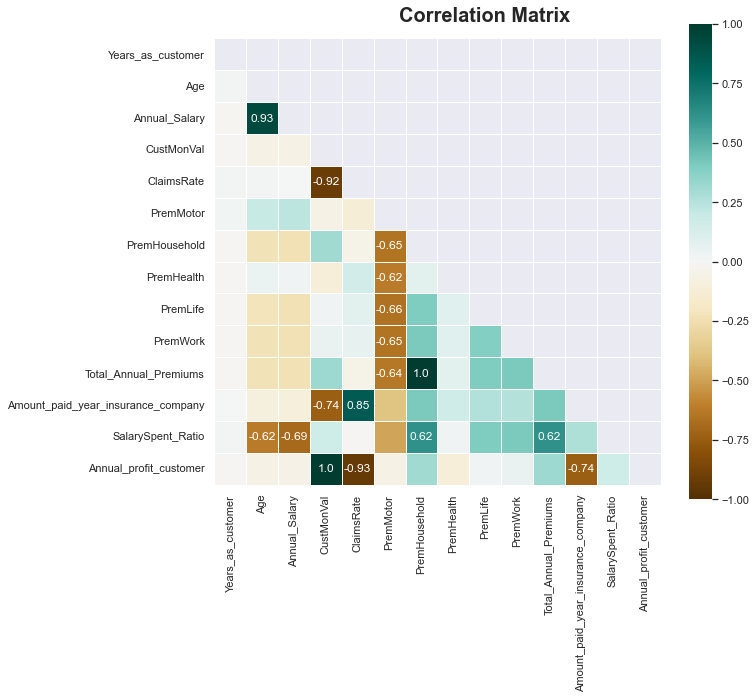

In [63]:
sns.set()

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix, rounding the values to 2 decimal cases
corr = np.round(customers[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Getting the Upper Triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Getting the labels for the heatmap
ticklabels = list()

for i in metric_features:
        ticklabels.append(i)

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, xticklabels = ticklabels,  yticklabels = ticklabels, annot=annot, 
            cmap='BrBG', fmt='s', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, mask=mask)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20, fontweight="bold")

plt.show()

## <div id="modelling">3. Modelling</div>

The following functions that will be helpful to make and evaluate our clusters.

Returns the **sum of squares** for all variables given a dataframe:

In [114]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

Returns the **r2 score**:

In [115]:
def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst   # Return the r2

In [116]:
def get_r2_scores(df, clusterer, min_k=1, max_k=6):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    
    # Iterate over number of clusters
    for n in range(min_k, max_k+1):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
        
    return r2_clust

Plots the r2 scores:

In [117]:
def plot_r2_scores(df):

    max_nclus = 5
    
    hierarchical = AgglomerativeClustering(affinity='euclidean')
    
    
    r2_scores = {}
    
    hc_methods = ["ward", "complete", "average", "single"]   
    for linkage in hc_methods:
        r2_scores[linkage] = get_r2_scores(df, hierarchical.set_params(linkage=linkage), max_k=max_nclus)    
    
    r2_hc_methods = pd.DataFrame(r2_scores)
    
    sns.set()
    # Plot data
    fig = plt.figure(figsize=(11,5))
    sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

    # Finalize the plot
    fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
    plt.gca().invert_xaxis()  # invert x axis
    plt.legend(title="HC methods", title_fontsize=11)
    plt.xticks(range(1, max_nclus + 1))
    plt.xlabel("Number of clusters", fontsize=13)
    plt.ylabel("R2 metric", fontsize=13)

    plt.show()

### <div id="segmentation">3.1 Segmentation</div>

For an easier cluster analysis, we have divided our clustering into two perspectives:

- __Customer Value:__ Evaluates groups of customers in terms of revenue generated and the costs of mantaining relationships with them.
    - _Variables used:_ 

- __Product Usage:__ Divides the customers based on their needs, attitudes and interests, taking into consideration their product usage.
    - _Variables used:_ 



In [118]:
customer_perspective1 = customers[['Annual_Salary','CustMonVal', 'Years_as_customer']].reset_index(drop=True)

customer_perspective2 = customers[['Years_as_customer', 'Annual_Salary',  'ClaimsRate']]

customer_perspective3 = customers[['SalarySpent_Ratio', 'Years_as_customer', 'ClaimsRate']].reset_index(drop=True)

customer_perspective4 = customers[['Annual_Salary', 'Amount_paid_year_insurance_company']]

product_perspective1 = customers[['PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']]

product_perspective2 = customers[['PremHousehold', 'PremLife', 'PremWork']] #When one increase the others tend to increase

product_perspective3 = customers[['Total_Annual_Premiums', 'PremMotor' ]] #When premmotor increses all the others prem decrease
#maybe bc people has less money

### 3.2 Clustering on Customer Value perspective

In [119]:
df_customer_perspective = customer_perspective3

In [120]:
df_customer_perspective

,SalarySpent_Ratio,Years_as_customer,ClaimsRate
0,-0.264831,0.153808,-0.918160
1,2.650090,0.759552,1.385392
2,-0.210087,-0.754809,-1.265271
3,0.410306,-0.603373,0.975171
4,-0.121333,0.002371,0.691171
...,...,...,...
9957,-0.557711,0.305244,0.880504
9958,0.527794,1.365297,-2.148826
9959,-0.452985,-1.209118,-1.486160
9960,-0.019728,0.759552,-0.097717


#### <div id="hierarchicalclustering">3.2.1 Hierarchical Clustering</div>

Let's start by defining which **linkage method** we are going to use.

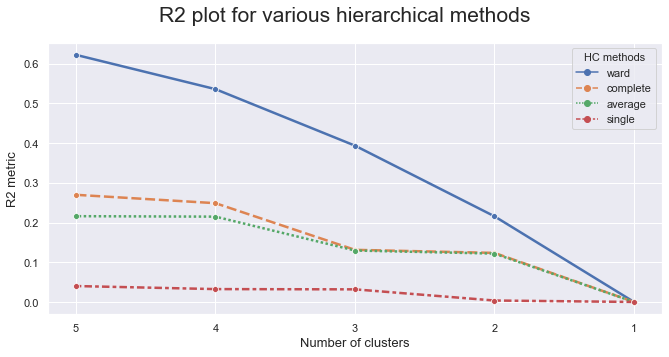

In [121]:
plot_r2_scores(df_customer_perspective)

**Ward** is by far the best linkage method, therefore it will be the one used.

In [122]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'

hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_customer_perspective)

array([5720, 8803, 8598, ...,    2,    1,    0], dtype=int64)

Let's now plot a **dendrogram**, which will help us choose the best number of clusters.

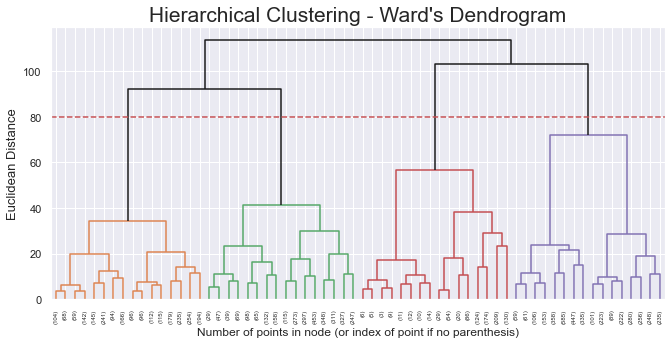

In [123]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack([hclust.children_, hclust.distances_, counts]).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 80 # where we want the dotted line
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

The optimal number of clusters seems to be around 3 to 4. Let's try both numbers and see which one produces the best r2 score.

In [124]:
# 3 cluster solution
hierarc_value_3 = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=3)
hierarc_value_3_labels = hierarc_value_3.fit_predict(df_customer_perspective)

# Characterizing the 3 clusters
hierarc_value_3 = pd.concat((df_customer_perspective, pd.Series(hierarc_value_3_labels, name='hierarc_labels')), axis=1)
hierarc_value_3.groupby('hierarc_labels').mean()

,SalarySpent_Ratio,Years_as_customer,ClaimsRate
hierarc_labels,,,
0,-0.184886,-0.729503,-0.027716
1,-0.281022,0.972240,0.135297
2,2.273950,0.243892,-0.403270


In [125]:
r2_hierarc_value = round(r2(df_customer_perspective, hierarc_value_3_labels),4)
print(f'R2 score with 3 clusters : {r2_hierarc_value}')

R2 score with 3 clusters : 0.3935


In [126]:
# 4 cluster solution
hierarc_value_4 = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
hierarc_value_4_labels = hierarc_value_4.fit_predict(df_customer_perspective)

# Characterizing the 4 clusters
hierarc_value_4 = pd.concat((df_customer_perspective, pd.Series(hierarc_value_4_labels, name='hierarc_labels')), axis=1)
hierarc_value_4.groupby('hierarc_labels').mean()

,SalarySpent_Ratio,Years_as_customer,ClaimsRate
hierarc_labels,,,
0,-0.281022,0.972240,0.135297
1,-0.097302,-0.776004,0.748491
2,2.273950,0.243892,-0.403270
3,-0.299431,-0.668688,-1.042860


In [127]:
r2_hierarc_value = round(r2(df_customer_perspective, hierarc_value_4_labels),4)
print(f'R2 score with 4 clusters : {r2_hierarc_value}')

R2 score with 4 clusters : 0.5357


The best solution is **4 clusters**.

#### <div id="kmeans">3.2.2 Partition methods (K-Means and K-Medoids)</div>

When it comes to partition methods, we can choose between **K-Means** and **K-Medoids**. The difference between the two methods is stand in K-Means each cluster is represented by a centroid that is basically the average of the points that belong to it, whereas in K-Medoids each cluster is represented by one of the points located near the center of cluster. 

Let's define which of the two works best for us.

In [128]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_customer_perspective)
kmeans_labels = kmeans.predict(df_customer_perspective)

# Calculate r2 score for kmeans clustering
kmeans_r2_score = r2_score(df_customer_perspective, kmeans.cluster_centers_[kmeans_labels])
print("R2 score for k-means clustering:", kmeans_r2_score)

# KMedoids clustering
kmedoids = KMedoids(n_clusters=4)
kmedoids.fit(df_customer_perspective)
kmedoids_labels = kmedoids.predict(df_customer_perspective)

# Calculate r2 score for kmedoids clustering
kmedoids_r2_score = r2_score(df_customer_perspective, kmedoids.cluster_centers_[kmedoids_labels])
print("R2 score for k-medoids clustering:", kmedoids_r2_score)

R2 score for k-means clustering: 0.5946119692518829
R2 score for k-medoids clustering: 0.5661083220839508


**K-Means** appears to be better. Let's now continue with this method and define how many clusters we want, with the help of the elbow method.

In [129]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_customer_perspective)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

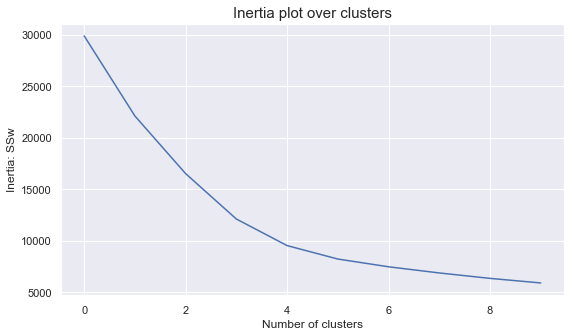

In [130]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

The inertia plot seems to confirm what we concluded in hierachical clustering: **4 clusters** is the best. Let's see if we get the same results from the **silhouette score**.

For n_clusters = 2, the average silhouette_score is : 0.24969758139563433
For n_clusters = 3, the average silhouette_score is : 0.24363106866054157
For n_clusters = 4, the average silhouette_score is : 0.25924350181412653
For n_clusters = 5, the average silhouette_score is : 0.26159274812911953
For n_clusters = 6, the average silhouette_score is : 0.2752981517093374
For n_clusters = 7, the average silhouette_score is : 0.27487192222517187
For n_clusters = 8, the average silhouette_score is : 0.27684793823810033
For n_clusters = 9, the average silhouette_score is : 0.27208594828840227
For n_clusters = 10, the average silhouette_score is : 0.26652050715961645


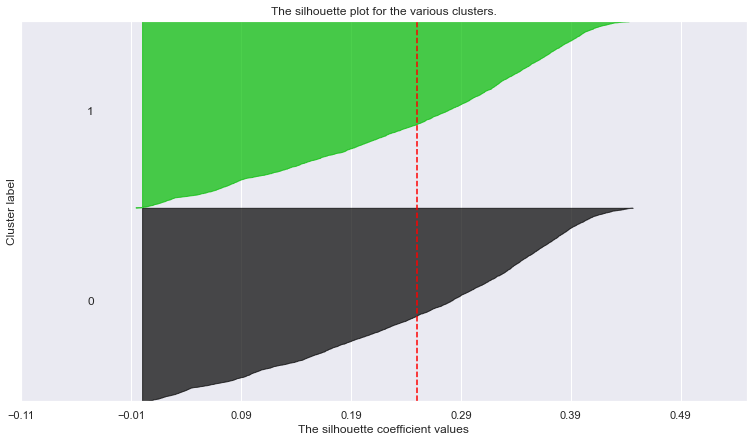

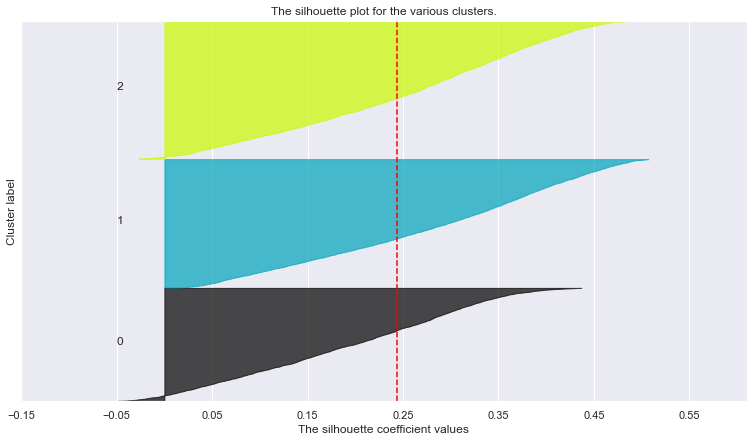

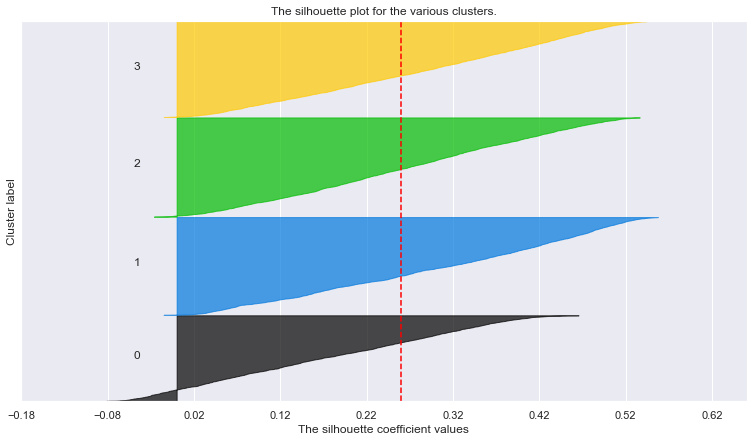

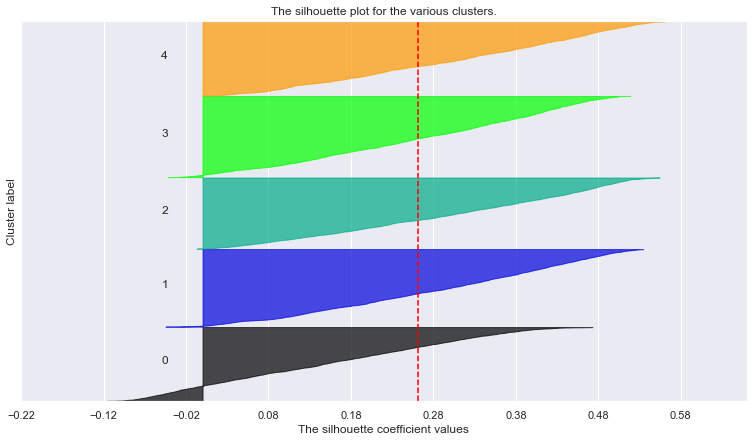

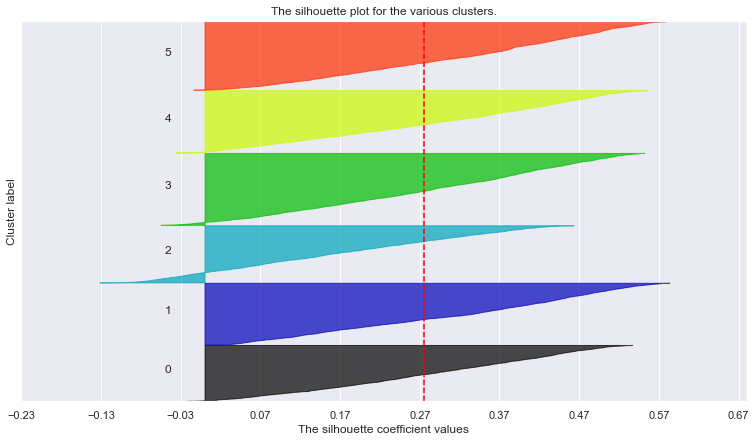

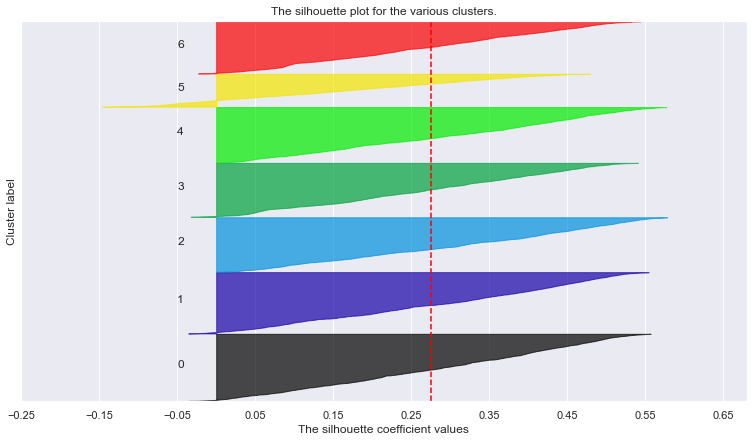

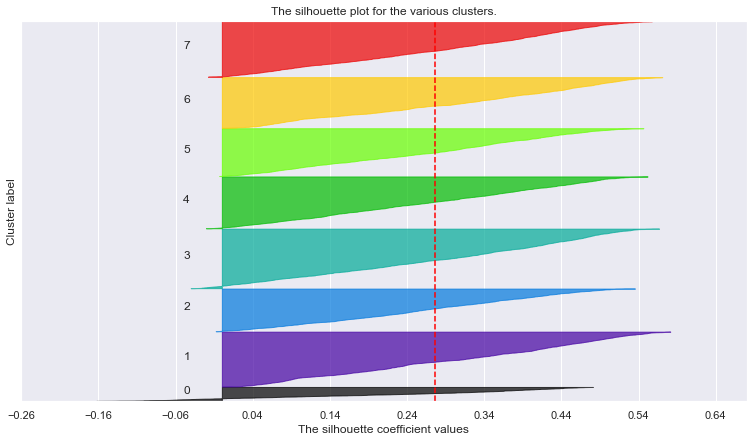

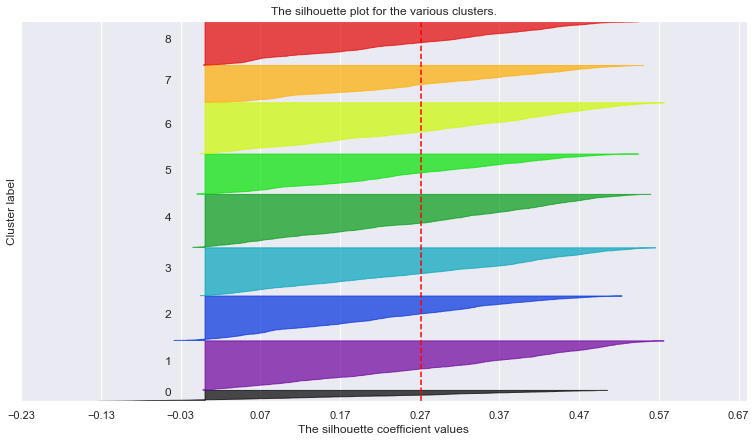

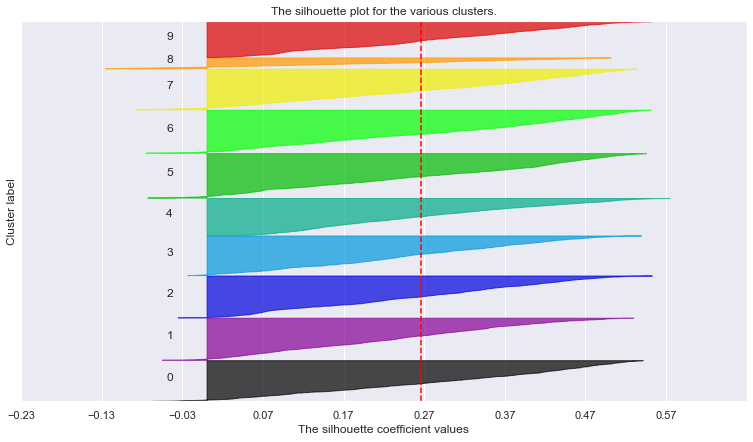

In [131]:
def plot_silhouette(df):

    avg_silhouette = []
    for nclus in range_clusters:
        # Skip nclus == 1
        if nclus == 1:
            continue

        # Create a figure
        fig = plt.figure(figsize=(13, 7))

        # Initialize the KMeans object with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
        cluster_labels = kmclust.fit_predict(df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(df, cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(nclus):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Filling the silhouette
            color = cm.nipy_spectral(float(i) / nclus)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")

        # The silhouette coefficient can range from -1, 1
        xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
        plt.xlim([xmin, xmax])

        # The (nclus+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(df) + (nclus + 1) * 10])

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks(np.arange(xmin, xmax, 0.1))

We can't draw any big conclusions from this. Let's stick with 4 clusters.

In [132]:
# 4 clusters solution
kmeans_value_4 = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=10)
kmeans_value_4_labels = kmeans_value_4.fit_predict(df_customer_perspective)

unique, counts = np.unique(kmeans_value_4_labels, return_counts=True)
print(dict(zip(unique, counts)))

# Characterizing the final clusters
kmeans_value_4 = pd.concat((df_customer_perspective, pd.Series(kmeans_value_4_labels, name='kmeans_labels')), axis=1)
kmeans_value_4.groupby('kmeans_labels').mean()

{0: 2884, 1: 3384, 2: 622, 3: 3072}


,SalarySpent_Ratio,Years_as_customer,ClaimsRate
kmeans_labels,,,
0,-0.186493,0.968381,0.619263
1,-0.213787,-0.047078,-1.118590
2,3.028430,0.041570,-0.033642
3,-0.202598,-0.865675,0.657643


In [133]:
r2_kmeans_value = round(r2(df_customer_perspective, kmeans_value_4_labels),4)
#silhouette_kmeans_value = round(silhouette(customer_perspective1, kmeans_value_2_labels),4)

print(f'R2 score : {r2_kmeans_value}')
#print(f'Silhouette score : {silhouette_kmeans_value}')

R2 score : 0.5946


#### <div id="meanshift">3.2.3 Mean Shift Clustering</div>

Let's start by estimathing the bandwidth with the **estimate_bandwidth** function from the sklearn.cluster module. This function uses the mean distance between points to estimate the bandwidth. We played with the quantile parameter in order to get an adequate number of clusters.

In [134]:
bandwidth = estimate_bandwidth(df_customer_perspective, quantile=0.40, random_state=1, n_jobs=-1)
bandwidth

1.9105018199296544

In [135]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_customer_perspective)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters: ", ms_n_clusters)

Number of estimated clusters:  4


In [136]:
# Concatenating the labels to df
df_concat = pd.concat([df_customer_perspective, pd.Series(ms_labels, index=df_customer_perspective.index, name="ms_labels")], axis=1)
df_concat.head()

,SalarySpent_Ratio,Years_as_customer,ClaimsRate,ms_labels
0,-0.264831,0.153808,-0.918160,0
1,2.650090,0.759552,1.385392,0
2,-0.210087,-0.754809,-1.265271,0
3,0.410306,-0.603373,0.975171,0
4,-0.121333,0.002371,0.691171,0


In [159]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_customer_perspective)  # get total sum of squares
ssw_labels = df_concat.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

KeyError: 'ms_labels'

#### <div id="dbscan">3.2.4 DBSCAN</div>

In [138]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_customer_perspective)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 4


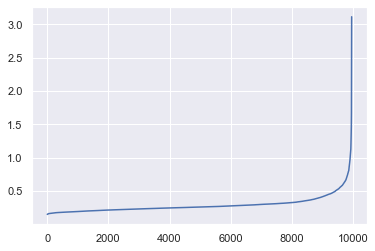

In [139]:
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_customer_perspective)
distances, _ = neigh.kneighbors(df_customer_perspective)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [140]:
# Concatenating the labels to df
df_concat = pd.concat([df_customer_perspective, pd.Series(dbscan_labels, index=df_customer_perspective.index, name="dbscan_labels")], axis=1)
df_concat.head()

,SalarySpent_Ratio,Years_as_customer,ClaimsRate,dbscan_labels
0,-0.264831,0.153808,-0.918160,0
1,2.650090,0.759552,1.385392,0
2,-0.210087,-0.754809,-1.265271,0
3,0.410306,-0.603373,0.975171,0
4,-0.121333,0.002371,0.691171,0


In [141]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1]

,SalarySpent_Ratio,Years_as_customer,ClaimsRate,dbscan_labels
246,9.388715,-0.754809,-1.486160,-1
1392,6.820433,-1.663426,-1.359938,-1
1763,11.158179,0.153808,0.722727,-1
3544,10.187067,1.365297,-1.296827,-1
8343,8.598706,-0.149065,-0.855049,-1
8519,10.153868,-0.906246,-1.328382,-1
8932,8.828192,-1.663426,-1.675493,-1
9078,3.261937,-0.906246,2.742280,-1


In [142]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]

sst = get_ss(df_customer_perspective)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst

print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0533


#### <div id="GaussianMixture">3.2.5 GMM (Gaussian Mixture Model )</div>

In [ ]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_customer_pespective)
          for n in n_components]

bic_values = [m.bic(df_customer_pespective) for m in models]
aic_values = [m.aic(df_customer_pespective) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [ ]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=5, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df_customer_pespective)

In [ ]:
# Concatenating the labels to df
df_customer_pespective_concat = pd.concat([df_customer_pespective, pd.Series(gmm_labels, index=df_customer_pespective.index, name="gmm_labels")], axis=1)
df_customer_pespective_concat.head()

#### <div id="SOM">3.2.6 Self-organizing maps</div>

In [160]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(1)

sm = sompy.SOMFactory().build(
    df_customer_perspective.values, 
    mapsize=[10, 10],  # NEEDS TO BE A LIST
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=df_customer_perspective.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.070000, quantization error: 0.771444

 epoch: 2 ---> elapsed time:  0.062000, quantization error: 1.507033

 epoch: 3 ---> elapsed time:  0.062000, quantization error: 1.437046

 epoch: 4 ---> elapsed time:  0.060000, quantization error: 1.425181

 epoch: 5 ---> elapsed time:  0.067000, quantization error: 1.418299

 epoch: 6 ---> elapsed time:  0.059000, quantization error: 1.414484

 epoch: 7 ---> elapsed time:  0.056000, quantization error: 1.411276

 epoch: 8 ---> elapsed time:  0.064000, quantization error: 1.408283

 epoch: 9 ---> elapsed time:  0.062000, quantization error: 1.405567

 epoch: 10 ---> elapsed time:  0.059000, quantization error: 1.403003

 epoch: 11 ---> elapsed time:  0.059000, quantization error: 1.400434

 epoch: 12 ---> elapsed time:  0.063000, quantization error: 1.397730

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.063000, quantization error: 0.509299

 epoch: 15 ---> elapsed time:  0.067000, quantization error: 0.509300

 epoch: 16 ---> elapsed time:  0.055000, quantization error: 0.509304

 epoch: 17 ---> elapsed time:  0.056000, quantization error: 0.509304

 epoch: 18 ---> elapsed time:  0.058000, quantization error: 0.509304

 epoch: 19 ---> elapsed time:  0.063000, quantization error: 0.509308

 epoch: 20 ---> elapsed time:  0.061000, quantization error: 0.509308

 epoch: 21 ---> elapsed time:  0.061000, quantization error: 0.509310

 epoch: 22 ---> elapsed time:  0.063000, quantization error: 0.509310

 epoch: 23 ---> elapsed time:  0.059000, quantization error: 0.509310

 epoch: 24 ---> elapsed time:  0.060000, quantization error: 0.509310

 epoch: 25 ---> elapsed time:  0.058000, quantization error: 0.509310

 epoch: 26 ---> elapsed time:  0.059000, quantization error: 0.509310

 epoch: 27 ---> elapsed time:  0.057000, quantization error: 0.509310

 epoch

Let's now visualize our **component planes**.

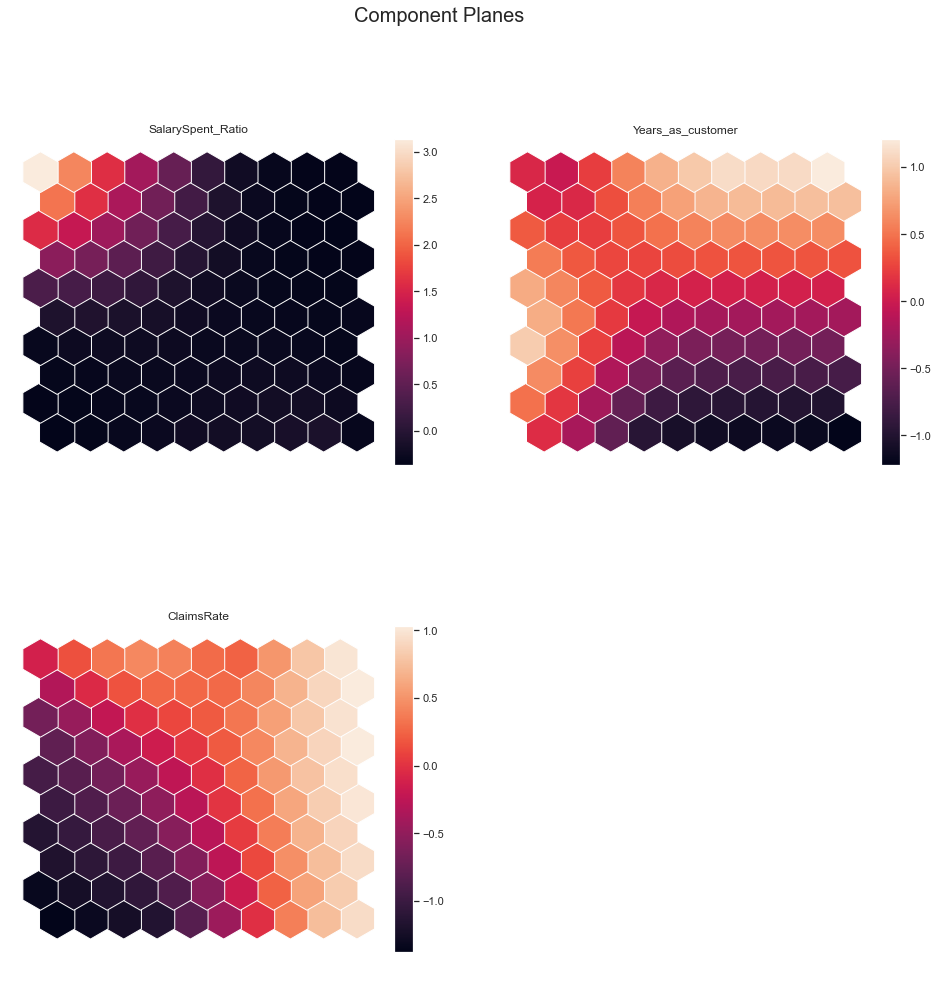

In [161]:
sns.set()
view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz=2, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

And now let's look at the **U-Matrix**.

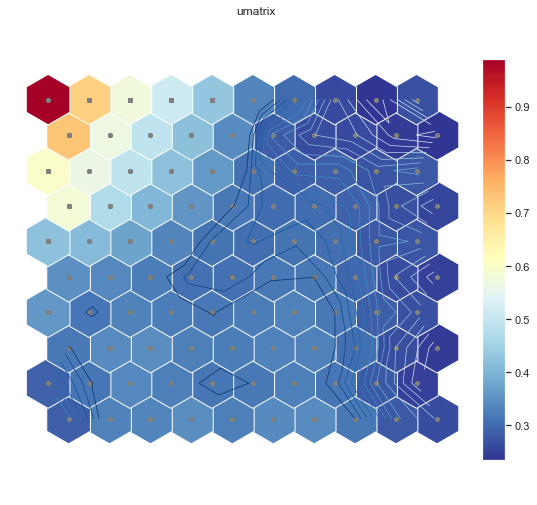

In [162]:
# U-matrix of the 50x50 grid
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=2, 
    row_normalized=False, 
    show_data=True, 
    contour=True, # Visualize isomorphic curves
    blob=False
)

And the **Hit-Map**.

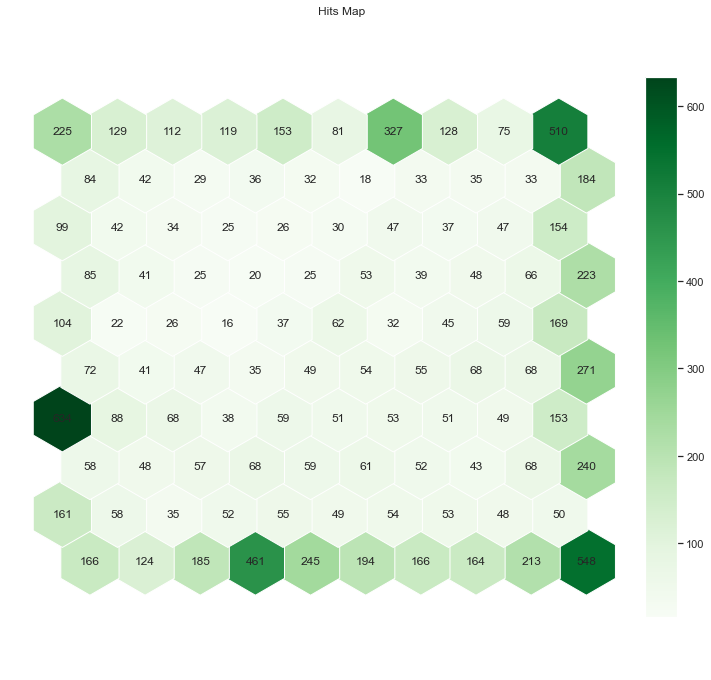

In [163]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greens")
plt.show()

#### K-Means over SOM

In k-means SOM, the number of units should be equal to the expected number of clusters, and thus each cluster should be represented by a single unit.

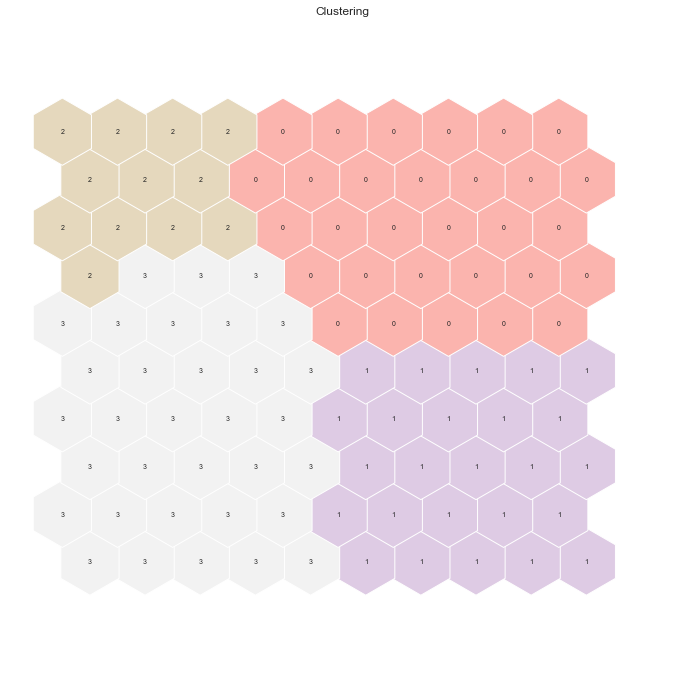

In [164]:
nodes = sm.codebook.matrix

kmeans_over_som_customer = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=1)
kmeans_over_som_customer_labels = kmeans_over_som_customer.fit_predict(nodes)
sm.cluster_labels = kmeans_over_som_customer_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [165]:
df_nodes = pd.DataFrame(nodes, columns=df_customer_perspective.columns)
df_nodes['kmeans_som_labels'] = kmeans_over_som_customer_labels
df_nodes

,SalarySpent_Ratio,Years_as_customer,ClaimsRate,kmeans_som_labels
0,-0.348922,1.210631,0.989008,0
1,-0.340802,1.102461,0.794828,0
2,-0.307236,1.094789,0.512843,0
3,-0.216244,1.108928,0.238642,0
4,0.110110,0.983960,0.283225,0
...,...,...,...,...
95,-0.221189,-1.062491,-0.836296,3
96,-0.269823,-0.960732,-1.157169,3
97,-0.295503,-0.609514,-1.244139,3
98,-0.331058,-0.212657,-1.310521,3


In [166]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(df_customer_perspective)[0] 

df_customer_bmus = pd.DataFrame(
    np.concatenate((df_customer_perspective, np.expand_dims(bmus_map,1)), axis=1),
    index=df_customer_perspective.index, columns=np.append(df_customer_perspective.columns,"BMU"))

df_customer_bmus

,SalarySpent_Ratio,Years_as_customer,ClaimsRate,BMU
0,-0.264831,0.153808,-0.918160,67.0
1,2.650090,0.759552,1.385392,8.0
2,-0.210087,-0.754809,-1.265271,97.0
3,0.410306,-0.603373,0.975171,71.0
4,-0.121333,0.002371,0.691171,41.0
...,...,...,...,...
9957,-0.557711,0.305244,0.880504,31.0
9958,0.527794,1.365297,-2.148826,69.0
9959,-0.452985,-1.209118,-1.486160,96.0
9960,-0.019728,0.759552,-0.097717,24.0


In [167]:
# Get cluster labels for each observation
kmeans_over_som_customer = df_customer_bmus.merge(df_nodes['kmeans_som_labels'], 'left', left_on="BMU", right_index=True)
kmeans_over_som_customer.drop(columns='BMU', inplace=True)
kmeans_over_som_customer.groupby('kmeans_som_labels').mean()

,SalarySpent_Ratio,Years_as_customer,ClaimsRate
kmeans_som_labels,,,
0,-0.270493,0.874950,0.695656
1,-0.246574,-0.930362,0.609265
2,2.291677,0.114213,-0.033036
3,-0.270606,0.031551,-1.128178


In [168]:
kmeans_over_som_customer_labels = np.array(kmeans_over_som_customer['kmeans_som_labels'])
kmeans_over_som_customer

,SalarySpent_Ratio,Years_as_customer,ClaimsRate,kmeans_som_labels
0,-0.264831,0.153808,-0.918160,3
1,2.650090,0.759552,1.385392,2
2,-0.210087,-0.754809,-1.265271,3
3,0.410306,-0.603373,0.975171,1
4,-0.121333,0.002371,0.691171,0
...,...,...,...,...
9957,-0.557711,0.305244,0.880504,0
9958,0.527794,1.365297,-2.148826,3
9959,-0.452985,-1.209118,-1.486160,3
9960,-0.019728,0.759552,-0.097717,0


In [172]:
kmeans_over_som_customer_labels = kmeans_over_som_customer_labels.astype(np.int64)

In [178]:
r2_score(df_customer_perspective, kmeans_over_som_customer_labels)

ValueError: y_true and y_pred have different number of output (3!=1)

In [177]:
r2_kmeans_over_som_customer = round(r2_score(df_customer_perspective, kmeans_over_som_customer_labels),4)
#silhouette_kmeans_over_som_customer = round(silhouette(df_customer_perspective, kmeans_over_som_customer_labels),4)

print(f'R2 score : {r2_kmeans_over_som_customer}')
#print(f'Silhouette score : {silhouette_kmeans_som_products}')

kmeans_som_products_results = pd.DataFrame((np.array([('K-means with SOM',4, 
                                r2_kmeans_som_products, silhouette_kmeans_som_products)])),
                          columns=['Method','Clusters','R*2','Silhouette'])
final_results_products = pd.concat((final_results_products, kmeans_som_products_results))

ValueError: y_true and y_pred have different number of output (3!=1)

#### Hierachical Clustering over SOM

In [ ]:
hierarchical_clustering_over_som = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_clustering_over_som_labels = hierclust.fit_predict(nodes)
sm.cluster_labels = hierarchical_clustering_over_som_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
df_customer_nodes = pd.DataFrame(nodes, columns=df_customer_perspective.columns)
df_customer_nodes['hierarchical_over_som_labels'] = hierarchical_clustering_over_som_labels

# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(df_customer_perspective)[0]  # get bmus for each observation in df_value

df_value_bmus = pd.DataFrame(
    np.concatenate((df_customer_perspective, np.expand_dims(bmus_map,1)), axis=1),
    index=df_customer_perspective.index, columns=np.append(df_customer_perspective.columns,"BMU"))

# Get cluster labels for each observation
hierarchical_over_som_customer = df_value_bmus.merge(df_customer_nodes['hierarchical_over_som_labels'], 'left', left_on="BMU", right_index=True)
hierarchical_over_som_customer.drop(columns='BMU', inplace=True)
hierarchical_over_som_customer.groupby('hierarchical_over_som_labels').mean()

In [ ]:
hierarchical_over_som_customer_labels = hierarchical_over_som_customer['hierarchical_over_som_labels']

r2_hierarc_som_value = round(r2(df_customer_perspective, hierarchical_over_som_customer_labels),4)
#silhouette_hierarc_som_value = round(silhouette(df_value, hierarc_som_value_4_labels),4)

print(f'R2 score : {r2_hierarc_som_value}')
#print(f'Silhouette score : {silhouette_hierarc_som_value}')

#### 3.3 Clustering on Product perspective

## 4. Merging the 2 perspectives

## 5. Cluster Analysis

## 6. Cluster Visualization